In [ ]:
!pip install astropy==4.1
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 5.6 MB/s 
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# numpy==1.19.5, astropy==4.1
import matplotlib.pyplot as plt
import numpy as np
import astropy
import scipy
from scipy.stats import sigmaclip
import os, sys
np.__version__, astropy.__version__, scipy.__version__

('1.21.6', '4.3.1', '1.4.1')

In [2]:
from zipfile import ZipFile
archivos = ZipFile('lc_20190128_2014YY49-original.zip', 'r')
# archivos = np.load('lc_20190128_2014YY49.zip')
archivos.extractall()

In [3]:
all_files = os.listdir("/content")
dat_files = filter(lambda x: x[-4:] == '.dat', all_files)
namelist = list(sorted(dat_files))

In [4]:
namelist

['20190128_Bend.dat',
 '20190128_Bishop.dat',
 '20190128_Blythe.dat',
 '20190128_CPSLO.dat',
 '20190128_Carson_City.dat',
 '20190128_Ellensburg.dat',
 '20190128_Goldendale.dat',
 '20190128_Indian_springs.dat',
 '20190128_Klamath_falls.dat',
 '20190128_Maupin.dat',
 '20190128_Mohave_valley.dat',
 '20190128_Okanogan.dat',
 '20190128_Oregon_obs.dat',
 '20190128_Parker.dat',
 '20190128_Quincy.dat',
 '20190128_Quincy_b.dat',
 '20190128_Reno.dat',
 '20190128_Sisters.dat',
 '20190128_Susanville.dat',
 '20190128_Susanville_b.dat',
 '20190128_Susanville_c.dat',
 '20190128_Wildwood.dat',
 '20190128_Yakima.dat',
 '20190128_Yuma.dat']

In [5]:
def is_float(string):
    """
    True if given string is float else False
    
    Input:
      string [string]: Data which is a string, for example the time, the
                       normalized flux, or the uncertainty of the flux
    
    Output:
      float(string) [float]: The float of the string
    """
    try:
        return float(string)
    except ValueError:
        return False

def get_basic_data(file_string):
  with open(file_string, 'r') as f:
    data = []
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
    data = np.array(data, dtype='O')
    time = data[:, 0]
    norm_flux = data[:, 1]
    flux_unc = data[:, 2]
    distances = []
    # compute distances between points
    for i in range(len(time) - 1):
      dist = time[i] - time[i+1]
      distances.append(dist) 
    # get the average
    time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
    return time, norm_flux, flux_unc, time_avg_sep

def group_by_missing(seq):
    if not seq:
        return seq
    grouped = [[seq[0]]]
    for x in seq[1:]:
        if x == grouped[-1][-1] + 1:
            grouped[-1].append(x)
        else:
            grouped.append([x])
    return np.array(grouped)

<Figure size 432x288 with 0 Axes>

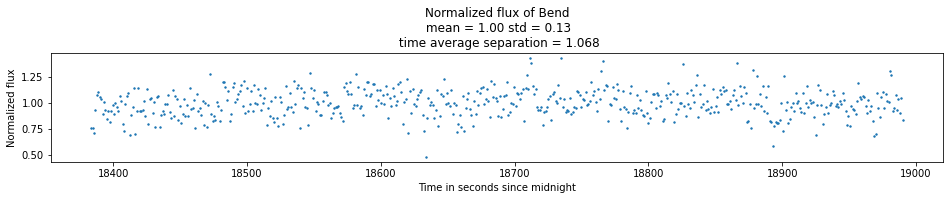

<Figure size 432x288 with 0 Axes>

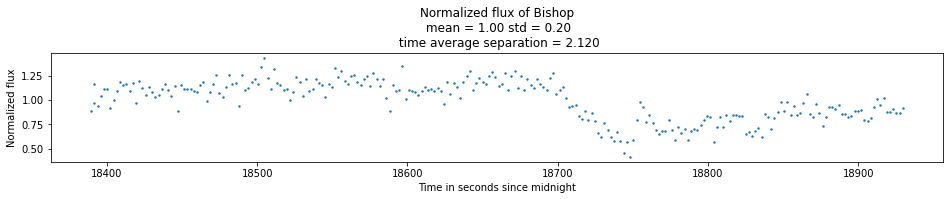

<Figure size 432x288 with 0 Axes>

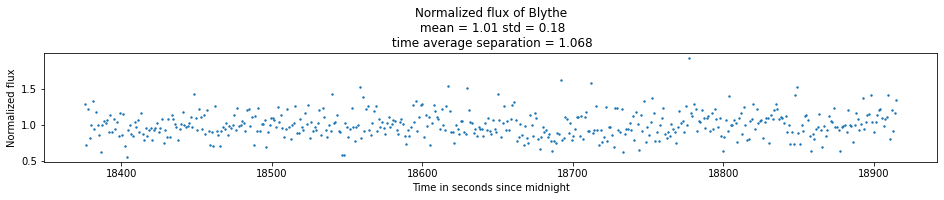

<Figure size 432x288 with 0 Axes>

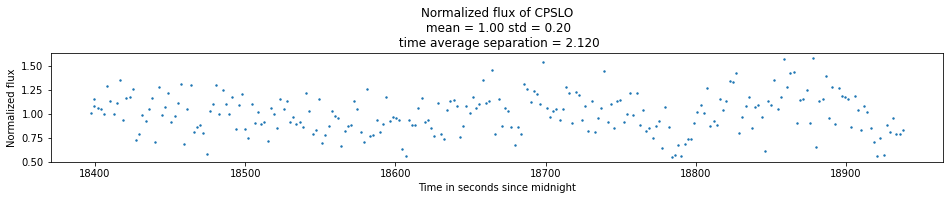

<Figure size 432x288 with 0 Axes>

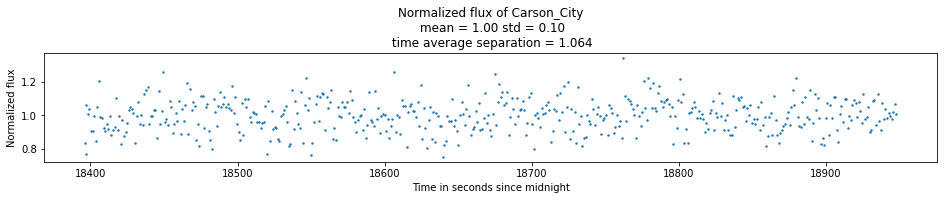

<Figure size 432x288 with 0 Axes>

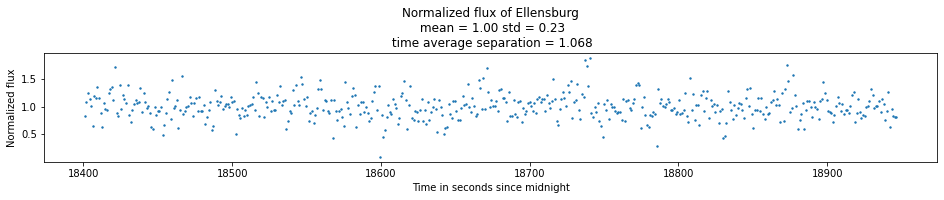

<Figure size 432x288 with 0 Axes>

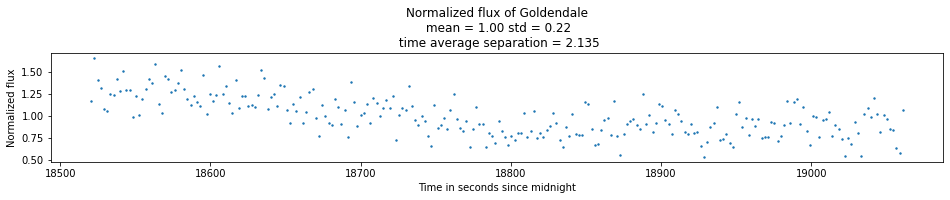

<Figure size 432x288 with 0 Axes>

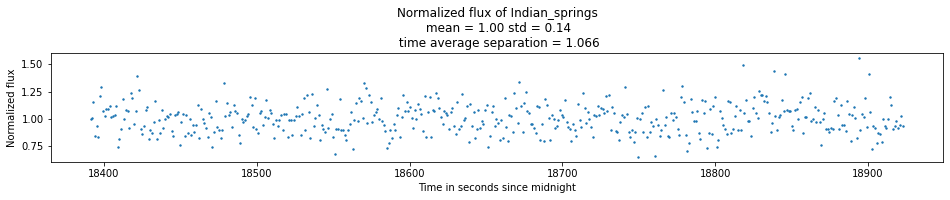

<Figure size 432x288 with 0 Axes>

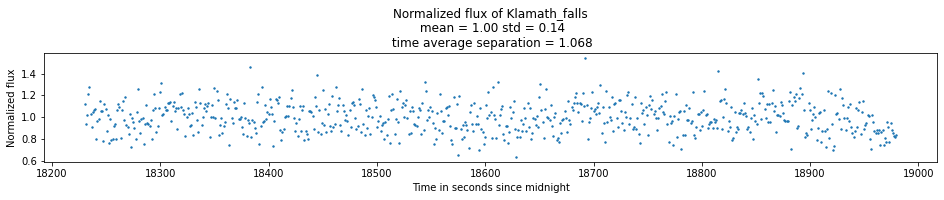

<Figure size 432x288 with 0 Axes>

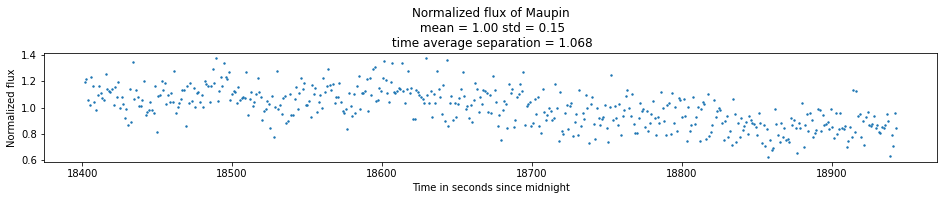

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

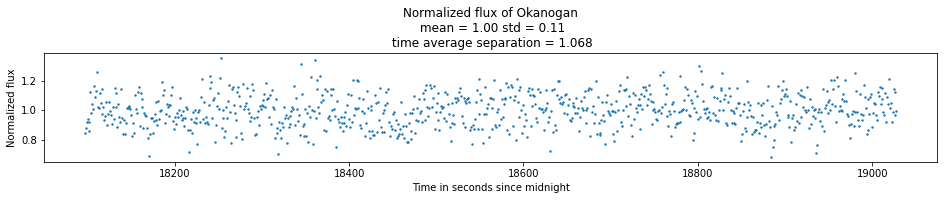

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

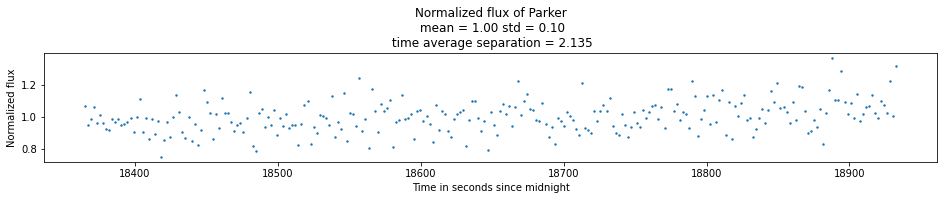

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

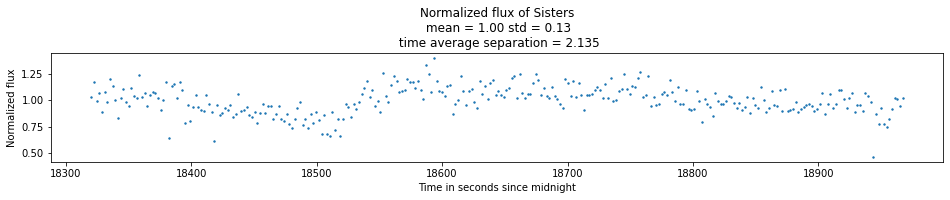

<Figure size 432x288 with 0 Axes>

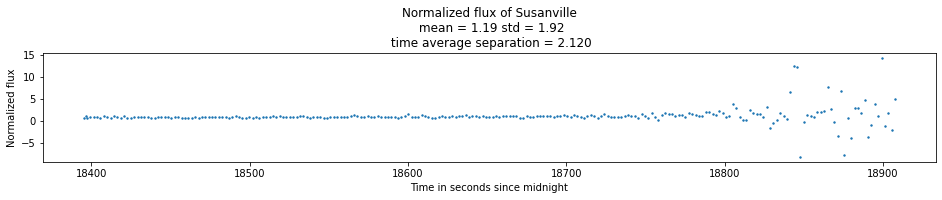

<Figure size 432x288 with 0 Axes>

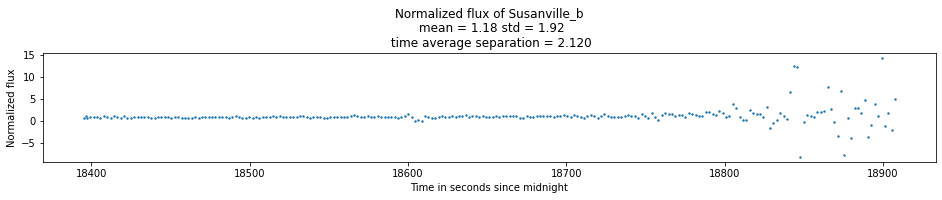

<Figure size 432x288 with 0 Axes>

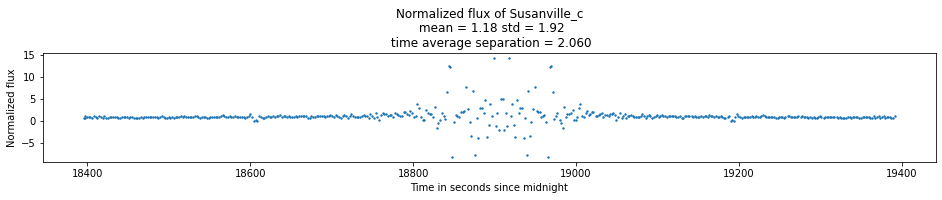

<Figure size 432x288 with 0 Axes>

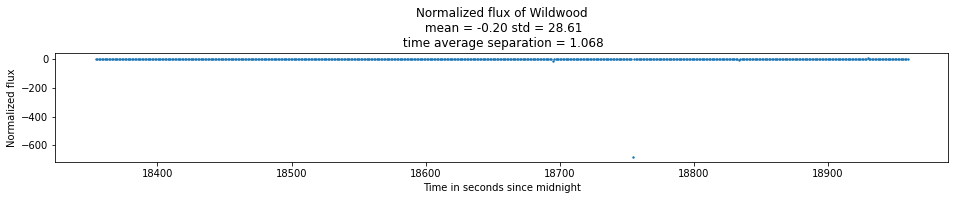

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

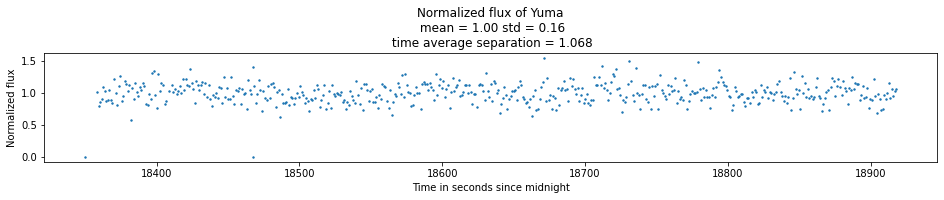

In [6]:
size = (16, 2)

special_locations = ['20190128_Quincy.dat',
                     '20190128_Quincy_b.dat',
                     '20190128_Reno.dat',
                     '20190128_Susanville_b.dat',
                     '20190128_Susanville_c.dat']

for file in namelist:
  time, norm_flux, flux_unc, time_avg_sep = get_basic_data(file)
  mean = np.mean(norm_flux)
  std = np.std(norm_flux)
  plt.clf()
  plt.figure(figsize=size)
  plt.scatter(time, norm_flux, s=2)
  plt.xlabel("Time in seconds since midnight")
  plt.ylabel("Normalized flux")
  plt.title('Normalized flux of '+str(file)[9:-4]+'\n mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std)+'\n time average separation = {:.3f}'\
            .format(time_avg_sep))
  plt.show()


# https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [7]:
# https://mail.google.com/mail/u/0/?tab=rm&ogbl#starred/QgrcJHrjCtFvDLGHjpjjqxngGMbGHZNfQgQ correo 29 abril
# https://www.minorplanetcenter.net/iau/Sizes.html

def rolling_mean_std_SR(array, wd_size=2):
  """
  Calculates the moving average, the standard deviation and the signal-to-noise
  ratio (SR) of an array x, considering a wd_size window.

  Inputs:
    array [array]: Array to which the mean, the standard deviation and the SR
                   are calculated
    
    wd_size [int]: Size of the mobile window, by default it is equal to 2

  Output:
    np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR) [tuple]:

    Tuple composed of the moving average, the mobile standard deviation and the
    mobile SR. It is useful to use a slicing of the output with [0] or [1] or
    [2] respectively to get just one of these.
  """
  rolling_mean = []
  rolling_std = []
  rolling_SR = []

  for i in range(len(array)):
    min = max(0, i - wd_size + 1)
    this_window = array[min : i + 1]

    # Calculate the mean
    window_average = sum(this_window) / len(this_window)
    # Calculate the std
    window_var = sum((array - window_average) ** 2 for array in this_window) / len(this_window)
    window_std = np.sqrt(window_var)

    # Add them to the arrays
    rolling_mean.append(window_average)
    rolling_std.append(window_std)
    rolling_SR.append(window_average/window_std)

  return np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR)

In [8]:
def safe_div(x, y):
  z = np.zeros(len(x))
  for i in range(len(x)):
    if y[i] == 0.0:
      z[i] = 0.0
    else:
      z[i] = x[i] / y[i]
  return z


In [9]:
# Por ejemplo, si la duración de la ocultación es de 0.1 s y el tiempo de
# exposición es de 0.05 s, entonces se usa un kernel de 0.1 / 0.05 = 2.

def size_kernel(exposure_time, maximum_exp_event_duration, unc_max_exp_event_duration=-1):
  """
  Gives the size of the kernel (and its uncertainty) that will be used in the
  cross-correlation. It uses the data of the maximum expected duration, its 
  uncertainty and the exposure time. 

  The maximum expected duration (equal to the ratio between the diameter and 
  velocity) is calculated assuming a spherical asteroid and
  an occultation that is detected diametrically, that is, that the center of
  the occultation shadow passes exactly over the observer.

  Inputs:
    exposure_time [float]: Exposure time. It is the cadence of the detection or
                           observation. It is in seconds.

    maximum_exp_event_duration [float]: Maximum expected duration of the event.
                                        It is obtained assuming a spherical
                                        asteroid and an occultation that is
                                        detected diametrically, that is, that
                                        the center of the occultation shadow
                                        passes exactly over the observer event.
                                        It is in seconds.

    unc_max_exp_event_duration [float]: Uncertainty of the maximum expected
                                        duration of the event. It is in seconds.
                                        By default is -1, but if there is no 
                                        info about the uncertainty, then the 
                                        uncertainty will be a fraction (50%) of 
                                        the maximum expected duration of the
                                        event.

  Output:
    kernel [int]:  Size of the kernel that will be used in the cross-correlation
                   It is the ratio between the duration of the occultation
                   (the ratio between the diameter and the velocity, which
                   is in seconds) and the exposure time.
  
  notas:
  nominal : cuando la ocultación es detectada diametralmente, es decir, que el 
            centro de la sombra de ocultación pasa exactamente sobre el
            observador del evento

  límite inferior: kernel = 2 (objeto pasa offset)
  límite superior: kernel = func(valor nominal duración + 1 sigma)
  prob(valor nomimal duración ± 1 sigma) = 68 % asumiendo error gaussiano
  duración nominal = 0.5 s
  1 sigma incerteza = 0.1 s
  lim superior = 0.6 y cubro 68 % de los casos y con el 0.6, uso mi función
  tal vez no es necesario iterar sobre kernels más pequeños
  z = x * y or z = x / y
  Δz / z =  √(Δx/x)^2 + √(Δy/y)^2 => Δz = z * (√(Δx/x)^2 + √(Δy/y)^2)
  """
  if unc_max_exp_event_duration == -1:
        unc_max_exp_event_duration = 0.5 * maximum_exp_event_duration
  kernel_size = maximum_exp_event_duration / exposure_time # z = x / y
  uncertainty_kernel_size = kernel_size * (unc_max_exp_event_duration / maximum_exp_event_duration)
  return round(kernel_size), round(uncertainty_kernel_size)


duration = 2.6 # assuming 5 % albedo <-> diameter=55.2 km and the TNO is moving 21.5 km/sec
# duration = 1 # assuming 30% albedo <-> diameter=22.5 km and the TNO is moving 21.5 km/sec
size_kernel(exposure_time=1, maximum_exp_event_duration=duration)


(3, 1)

In [10]:
lc =   np.array([0, 0, 0, 0, -0.3, -0.3, 0, 0, 0, 0])
kernel = np.array([0, 0, 0, 0, -1, -1, 0, 0, 0, 0]) # nominal kernel=2
len_kernel = len(kernel[kernel == -1])  
correlate = np.correlate(lc, kernel, 'valid')
correlate, len_kernel

(array([0.6]), 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


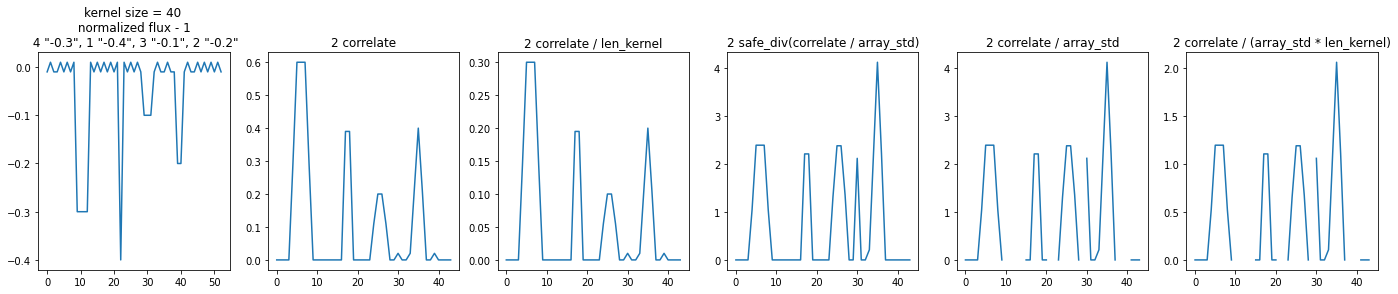

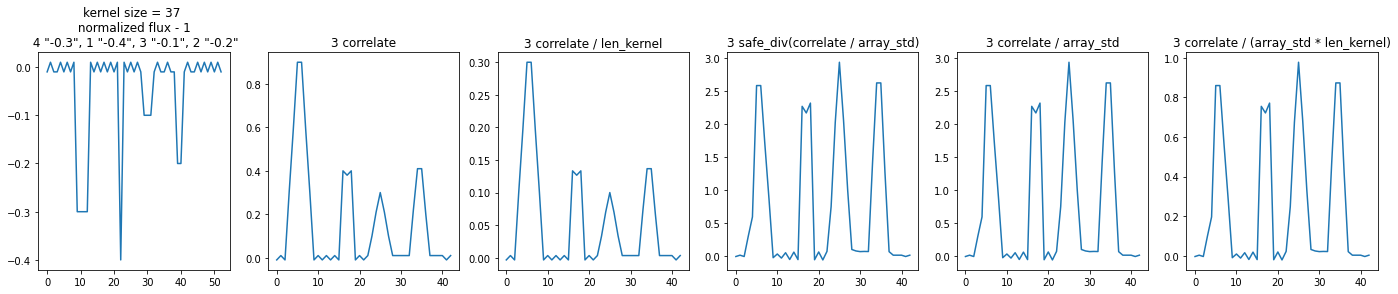

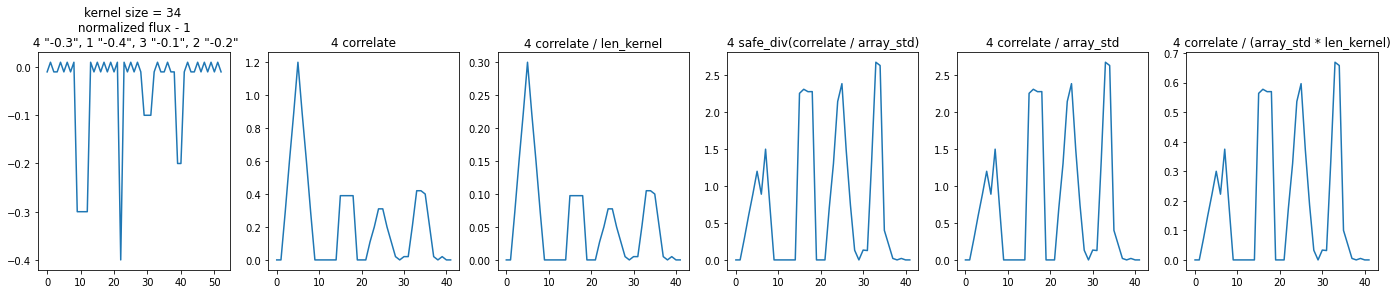

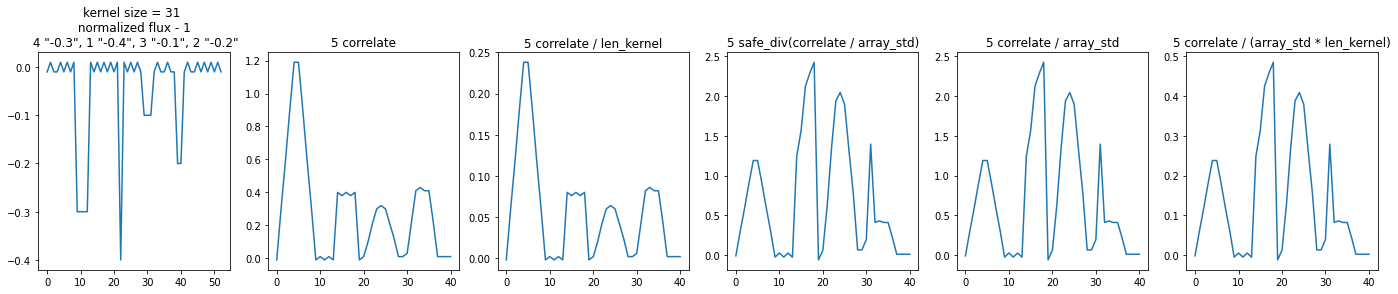

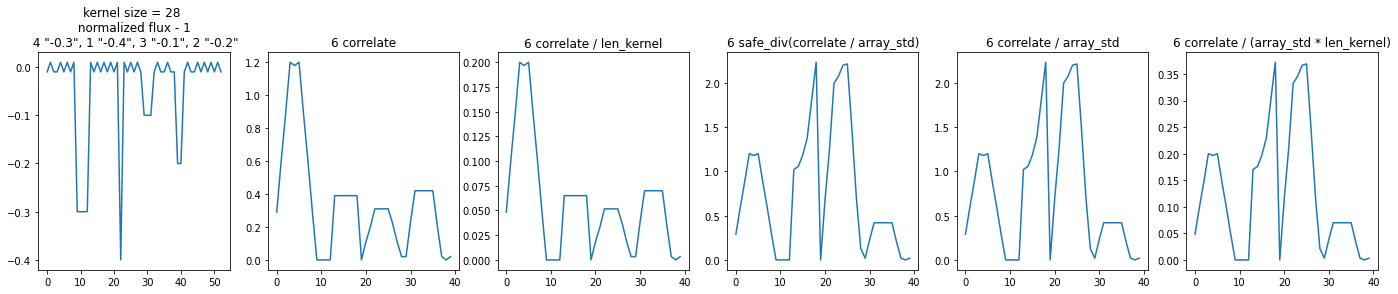

In [11]:
# lc es un array con 4 datos genericos a la izq. y a la der., no es real pues
# los flux_norm son arrays de 200 datos, y la caida no ocurre en medio

# peak depende del ancho del kernel

norm_flux =   np.array([-0.01, 0.01, -0.01, -0.01, 0.01, -0.01, 0.01, -0.01, 0.01,
                 -0.3, -0.3, -0.3, -0.3, 0.01, -0.01, 0.01,
                 -0.01, 0.01, -0.01, 0.01, -0.01, 0.01, -0.4, 0.01, -0.01, 0.01,
                 -0.01, 0.01, -0.01, -0.1, -0.1, -0.1, -0.01, 0.01, -0.01,
                 -0.01, 0.01, -0.01, -0.01, -0.2, -0.2, -0.01, 0.01, -0.01,
                 -0.01, 0.01, -0.01, 0.01, -0.01, 0.01, -0.01, 0.01, -0.01])
for i in range(1, 7):
  a = np.zeros(4)
  b = - np.ones(i)
  kernel = np.concatenate((a, b, a), axis=None)
  # print(kernel)
  len_kernel = len(kernel[kernel == -1])
  correlate = np.correlate(norm_flux, kernel, 'valid')
  width = 2 * len(b) - 1 # ancho del peak de cross-correlacion con kernel optimo
  half_window = width + 0 # 10 es variable
  start = half_window #####
  sigma = np.std(correlate) / np.std(norm_flux)
  # threshold = 8 * sigma / len(b)
  array_std = np.ones(len(correlate))
  array_length = np.zeros(len(correlate))
  for j in range(start, len(correlate)-start, 1):
    array_window = correlate[j - half_window : j + half_window + 1]
    array_wnd_clip = sigmaclip(array_window, low = sigma, high = sigma)[0]  
    array_std[j] = np.std(array_wnd_clip)
    array_length[j] = array_wnd_clip.shape[0] # cantidad de puntos usados para el calculo de std de sigmaclip

  
  fig, axs = plt.subplots(1, 6, figsize=(24,4))
  axs[0].plot(norm_flux)
  axs[0].set_title('kernel size = {}'.format(j)+' \n normalized flux - 1 \n 4 "-0.3", 1 "-0.4", 3 "-0.1", 2 "-0.2"')

  axs[1].plot(correlate)
  axs[1].set_title(str(i)+' correlate')

  axs[2].plot(correlate / len_kernel)
  axs[2].set_title(str(i)+' correlate / len_kernel')

  axs[3].plot( safe_div(correlate, array_std))
  axs[3].set_title(str(i)+' safe_div(correlate / array_std)')

  axs[4].plot(correlate / array_std)
  axs[4].set_title(str(i)+' correlate / array_std')

  axs[5].plot(correlate / (array_std * len_kernel))
  axs[5].set_title(str(i)+' correlate / (array_std * len_kernel)')


kernel length is  2
[32, 35, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 63, 72, 126] 5
[18472.023 18480.566 18501.92 18538.223 18557.443 18672.757]
------------------------------------------------------
kernel length is  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


kernel length is  4
[94] 6
[18606.558]
------------------------------------------------------
kernel length is  5
kernel length is  6
kernel length is  7
kernel length is  8
kernel length is  9


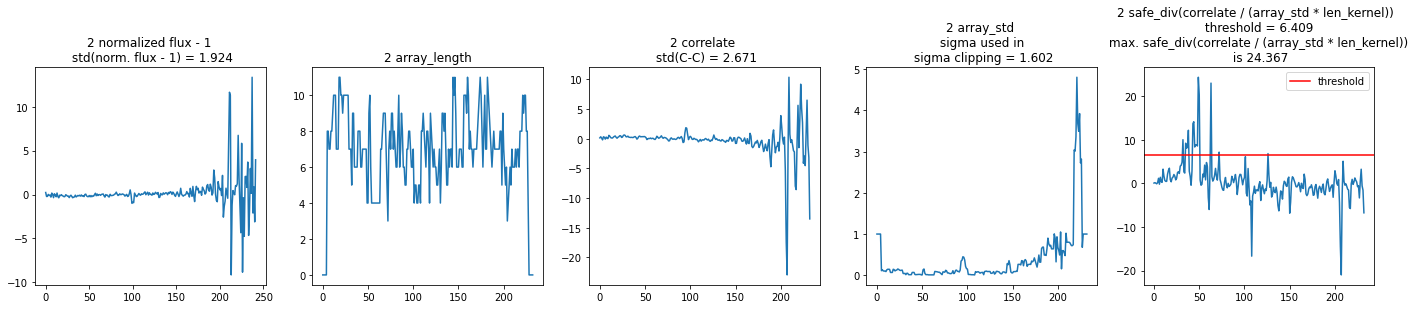

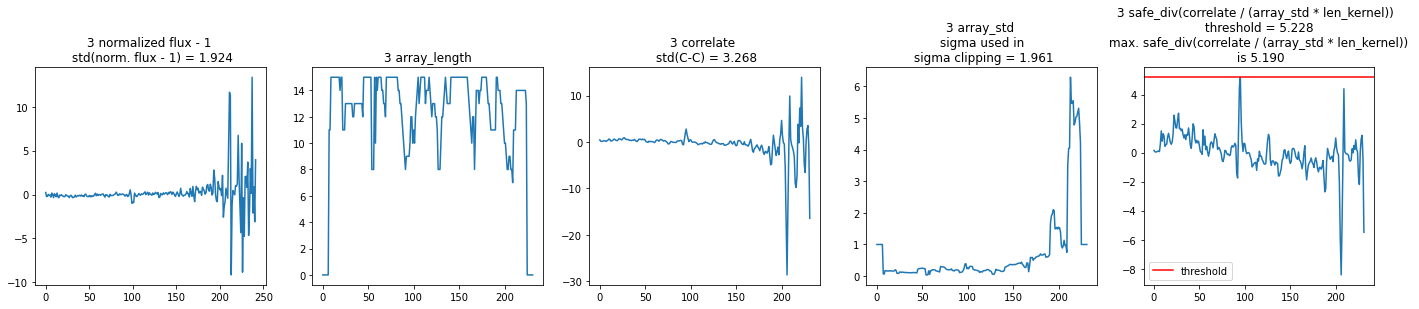

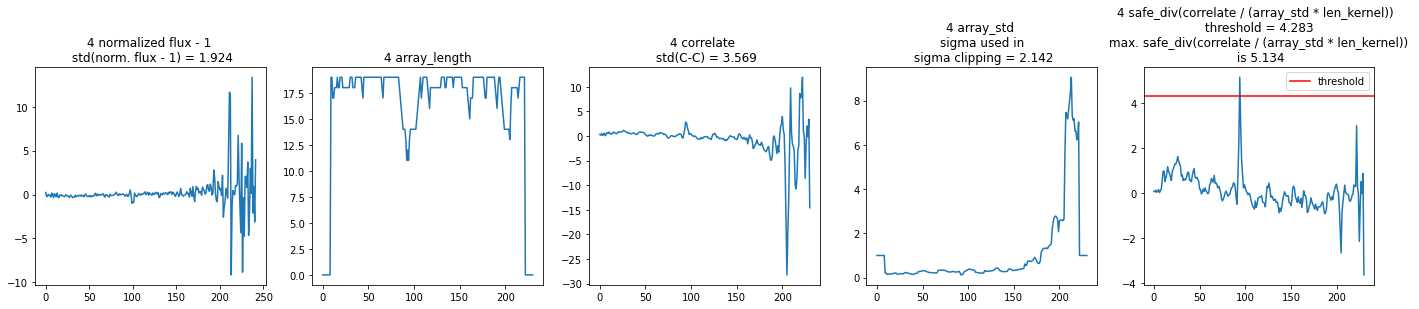

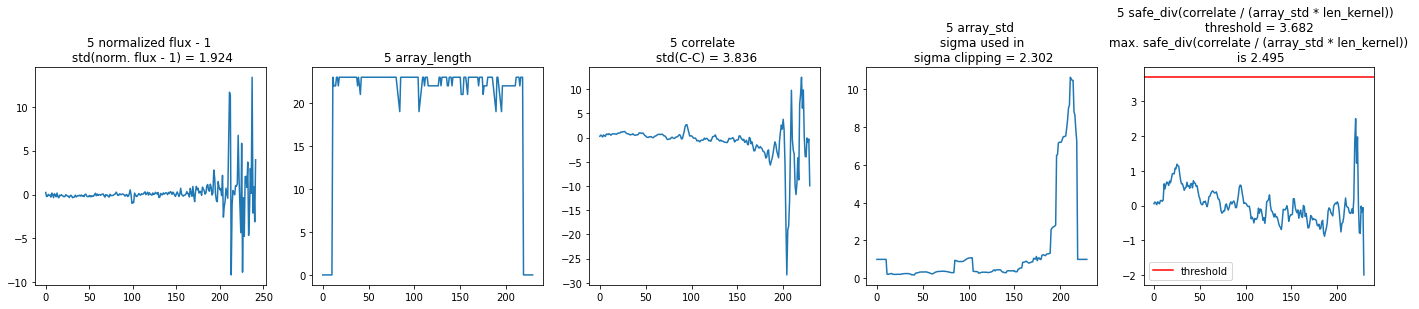

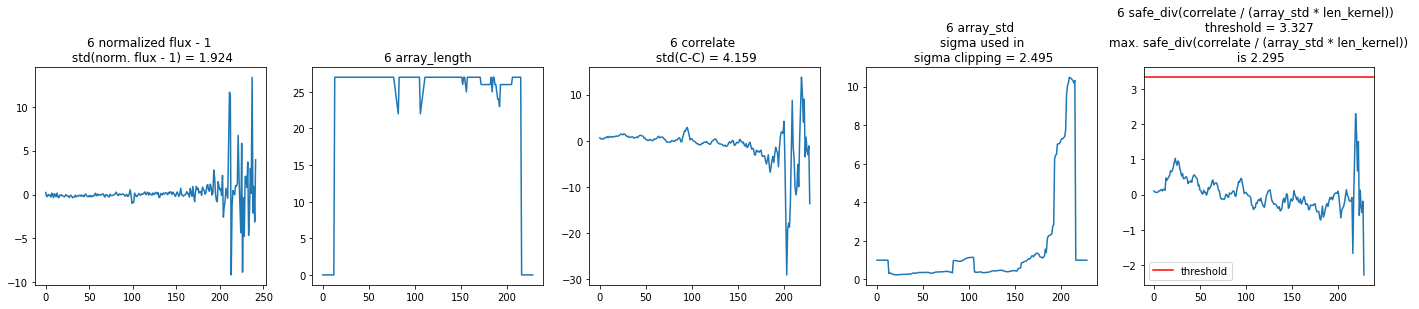

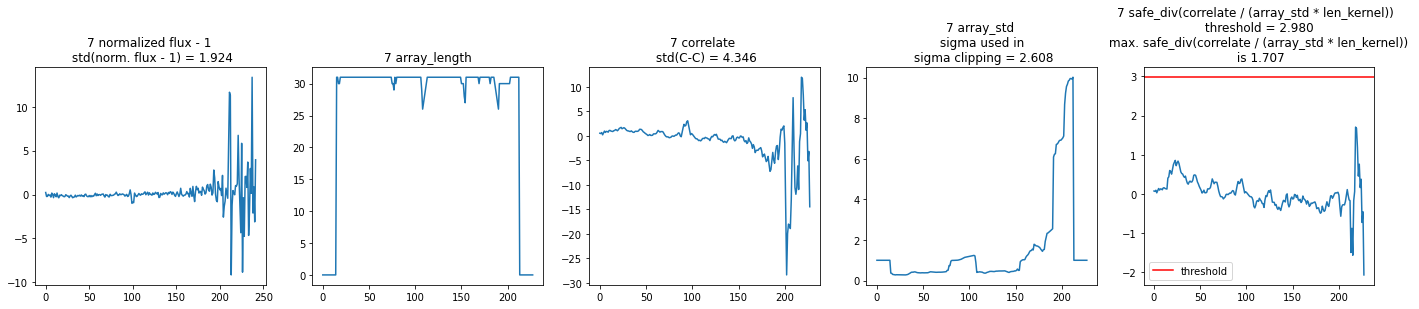

In [12]:
# sigmaclip: scipy.stats.sigmaclip(a, low=4.0, high=4.0)
# Perform iterative sigma-clipping of array elements.
# Starting from the full sample, all elements outside the critical range are removed,
# i.e. all elements of the input array c that satisfy either of the following conditions:
# c < mean(c) - std(c)*low
# c > mean(c) + std(c)*high

time, norm_flux, flux_unc, time_avg_sep = get_basic_data('20190128_Susanville_b.dat')
for i in range(2, 10):
  a = np.zeros(4)
  b = - np.ones(i)
  kernel = np.concatenate((a, b, a), axis=None)
  len_kernel = len(kernel[kernel == -1])
  print('kernel length is ', len_kernel)
  correlate = np.correlate(norm_flux-1, kernel, 'valid')
  width = 2 * len_kernel - 1 # ancho del peak de cross-correlacion con kernel optimo
  half_window = width + 2 # width pequeño -> array_std con 0
  start = half_window #####
  # sigma = 1.1 * np.std(correlate) / np.std(norm_flux-1)
  sigma = 0.6 * np.std(correlate)
  threshold = 8 * (sigma/ len_kernel)
  array_std = np.ones(len(correlate))
  array_length = np.zeros(len(correlate))
  for j in range(start, len(correlate)-start, 1):
    array_window = correlate[j - half_window : j + half_window + 1]
    try:
      array_wnd_clip = sigmaclip(array_window, low = sigma, high = sigma)[0]
    except ZeroDivisionError:
      array_wnd_clip = array_window
    # try:
    #   array_wnd_clip = sigma_clip(array_window, sigma=sigma)
    # except TypeError:
    #   array_wnd_clip = array_window
    array_std[j] = np.std(array_wnd_clip)
    array_length[j] = array_wnd_clip.shape[0] # cantidad de puntos usados para el calculo de std de sigmaclip

  fig, axs = plt.subplots(1, 5, figsize=(24,4))
  axs[0].plot(norm_flux-1)
  axs[0].set_title(str(i)+' normalized flux - 1 \n std(norm. flux - 1) = {:.3f}'.format(np.std(norm_flux-1)))

  axs[1].plot(array_length)
  axs[1].set_title(str(i)+' array_length')

  axs[2].plot(correlate)
  axs[2].set_title(str(i)+' correlate \n std(C-C) = {:.3f}'.format(np.std(correlate)))

  axs[3].plot(array_std)
  axs[3].set_title(str(i)+' array_std \n sigma used in \n sigma clipping = {:.3f}'.format(sigma))

  # print(correlate[165:175])
  # print(array_std[165:175])
  # print('np.where(array_std==0)', np.where(array_std==0))
  # print('np.where(array_std==0.0)', np.where(array_std==0.0))

  axs[4].plot(safe_div(correlate, (array_std * len_kernel)))
  axs[4].axhline(threshold, color='r', label='threshold')
  axs[4].set_title(str(i)+' safe_div(correlate / (array_std * len_kernel))  \n threshold = {:.3f}'.format(threshold)+
                   ' \n max. safe_div(correlate / (array_std * len_kernel)) \n is {:.3f}'.format(np.max(safe_div(correlate, (array_std * len_kernel)))))
  axs[4].legend()
 
  list_mask = [ k for k in range(start, len(correlate)-start, 1) if safe_div(correlate, (array_std * len_kernel))[k] > threshold]
  if list_mask != []:
    # print(np.array(list_mask))
    print(list_mask, round(kernel.shape[0]/2))
    mean = [int(np.mean(i)) for i in group_by_missing(list_mask)]
    print(time[np.array(mean) + round(kernel.shape[0] / 2)])
    print('------------------------------------------------------')


In [13]:
def code_to_debug():
  import pdb; pdb.set_trace()

  size_kernel(maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0.5, exposure_time=0.05)

In [14]:
# code_to_debug()

In [28]:
def algorithm(input, time, norm_flux, flux_unc, time_avg_sep, kernel_size,
              half_window=30, num_zeros=4, sigma=2):
  """
  input [string]: The string of the filename

  num_zeros [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros, assuming that the
                   cross-correlation is made with normalized flux - 1.
                   By default is 4.

  num_ones [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros, assuming that the
                   cross-correlation is made with normalized flux - 1.
                   By default is 3.

  half_window [int]: The window size. By default is 30.

  threshold [int]: The threshold limit used in the evaluation (if a point in the
                   cross-correlation / array of standard deviations > threshold)
                   This is inpired on the algorithm used in Bickerton et al. (2008)

  sigma [int]: The sigma used in sigma clipping.
               It will be used in scipy.sigmaclip
  """
  with open(input, 'r') as f:
    time, norm_flux, flux_unc, time_avg_sep = get_basic_data(input)
    # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
    a = np.zeros(num_zeros) # 4
    # b = - np.ones(size_kernel(55.2, 21.5, 2)) # here b == 1 ITERAR SOBRE EL TAMAÑO DE KERNEL b
    b = - np.ones(kernel_size) # 3
    kernel = np.concatenate((a, b, a), axis=None)
    len_kernel = len(kernel[kernel == -1])
    correlate = np.correlate(norm_flux-1, kernel, 'valid')
    # if (correlate > 100).any():
    #   return print('Cross-correlation is too high, there is a bad observation at '\
    #                +str(input)[9:-4]+', max. cross-correlation is', np.max(correlate))
      
    width = 2 * len_kernel - 1 # ancho del peak de cross-correlacion con kernel optimo
    half_window = width + 30 # 10 es variable
    start = half_window #####
    # sigma = np.std(correlate) / np.std(norm_flux)
    sigma = sigma
    threshold = 22 * np.std(correlate)
    print('Location: ', str(input)[9:-4])
    print('std C-C = {:.3f}'.format(np.std(correlate)))
    print('sigma = {:.3f}'.format(sigma))
    print('threshold = {:.3f}'.format(threshold))
    array_std = np.ones(len(correlate))
    array_length = np.zeros(len(correlate))
    for i in range(start, len(correlate)-start, 1):
      array_window = correlate[i - half_window : i + half_window + 1]
      array_wnd_clip = sigmaclip(array_window, low = sigma, high = sigma)[0]
      array_std[i] = np.std(array_wnd_clip)
      array_length[i] = array_wnd_clip.shape[0] # cantidad de puntos usados para el calculo de std de sigmaclip

    # if (safe_div(correlate, array_std) > 300).any():
    #   return print('safe_div(correlate, array_std) is too high, there is an error at '\
    #                +str(input)[9:-4]+', maximum safe_div(correlate, array_std) is ', np.max(safe_div(correlate, array_std)))

    list_mask = [ i for i in range(start, len(correlate)-start, 1) if safe_div(correlate, (array_std * len_kernel))[i] > threshold ]
    if list_mask == []:
      print('There is no possible detection at '+str(input)[9:-4]+' with threshold = {}'.format(threshold))
    # if (safe_div(correlate, array_std) > 100 * threshold).any():
    #   return print('correlate / array_std too high maximum safe_div(correlate, array_std) is ', np.max(safe_div(correlate, array_std)))
    print('Ratio correlate / (array_std * len_kernel) is between {:.3f}'.format(np.min(safe_div(correlate, (array_std * len_kernel))))+' to {:.3f}'\
          .format(np.max(safe_div(correlate, (array_std * len_kernel)))))
    print('Kernel size :', len_kernel)
      
    fig, axs = plt.subplots(1, 5, figsize=(20,5))
    axs[0].plot(norm_flux-1)
    axs[0].set_title('normalized flux - 1 at '+str(input)[9:-4]+'\n time average separation = {:.3f}'.format(time_avg_sep)+\
                     ' \n std(norm. flux) = {:.3f}'.format(np.std(norm_flux)))

    axs[1].plot(array_length)
    axs[1].set_title('array_length at '+str(input)[9:-4])

    axs[2].plot(correlate, label='correlate')
    axs[2].set_title('correlate at '+str(input)[9:-4]+'\n kernel size = {}'.format(len_kernel)+\
                     ' \n std(C-C) = {:.3f}'.format(np.std(correlate)))

    axs[3].plot(array_std)
    axs[3].set_title('array_std at '+str(input)[9:-4]+'\n sigma = {}'.format(sigma))

    axs[4].plot(safe_div(correlate, (array_std * len_kernel)), label='safe_div(correlate, array_std)')
    axs[4].axhline(threshold, color='r', label='threshold')
    axs[4].set_title('correlate / (array_std * len_kernel) at '+str(input)[9:-4]+'\n half_window = {}'\
                     .format(half_window)+'\n threshold = {:.3f}'.format(threshold))
    plt.show()
    # print('list_mask', list_mask)
    if list_mask != []:
      mean = [int(np.mean(i)) for i in group_by_missing(list_mask)]
      print(len(time[np.array(mean) + round(kernel.shape[0] / 2)]), 'possible detections in '+str(input)[9:-4]+\
            ', in time : '+str(time[np.array(mean) + round(kernel.shape[0] / 2)]))
      print('--------------------------------------------------------------------------------------------')
      return time[np.array(mean) + round(kernel.shape[0] / 2)]
    print('--------------------------------------------------------------------------------------------')

**Quincy**

18643.803, 0.9477, 0.0777

18645.942, 0.5093, 0.0654 <-----

18648.077, 0.9617, 0.0758

**Quincy_b**

18643.803, 0.9477, 0.0777

18645.942, 0.5093, 0.0654 <-----

18648.077, 0.5110, 0.0758 <-----

18650.210, 0.5490, 0.0732 <-----

18652.347, 1.0000, 0.0693

**Reno**

18640.348, 0.7102, 0.1398

18641.416, 0.1675, 0.1342 <-----

18642.483, 0.8404, 0.1401

**Susanville b**

18602.287, 0.9905, 1.1092

18604.424, 0.0035, 1.0592 <-----

18606.558, 0.1317, 1.0123 <-----

18608.693, 0.0733, 1.4391 <-----

18610.831, 1.1711, 1.3257

In [29]:
time, norm_flux, flux_unc, time_avg_sep = get_basic_data('20190128_Susanville_b.dat')
size_kernel(exposure_time=time_avg_sep, maximum_exp_event_duration=duration)

(1, 1)

Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Bend
std C-C = 0.130
sigma = 2.000
threshold = 2.856
Ratio correlate / (array_std * len_kernel) is between -5.204 to 5.835
Kernel size : 1


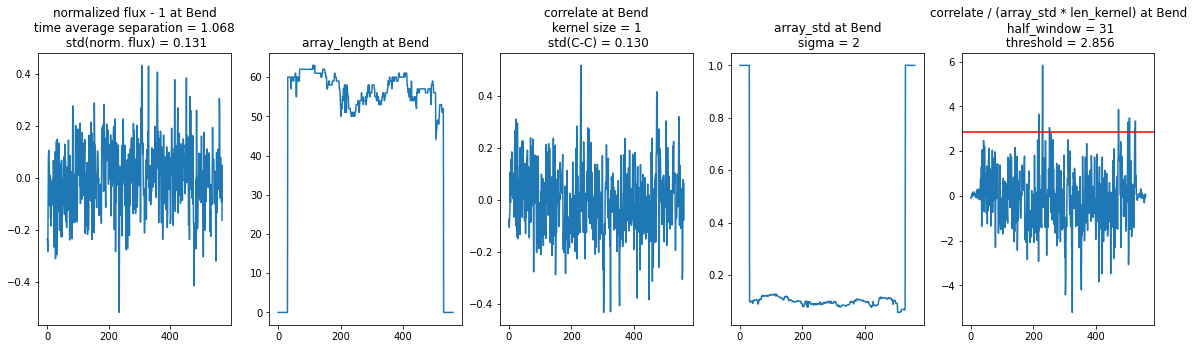

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


8 possible detections in Bend, in time : [18620.614 18632.364 18656.914 18892.884 18924.914 18930.254 18948.404
 18950.544]
--------------------------------------------------------------------------------------------
Location:  Bend
std C-C = 0.201
sigma = 2.000
threshold = 4.416
There is no possible detection at Bend with threshold = 4.4158057964056106
Ratio correlate / (array_std * len_kernel) is between -2.959 to 2.970
Kernel size : 2


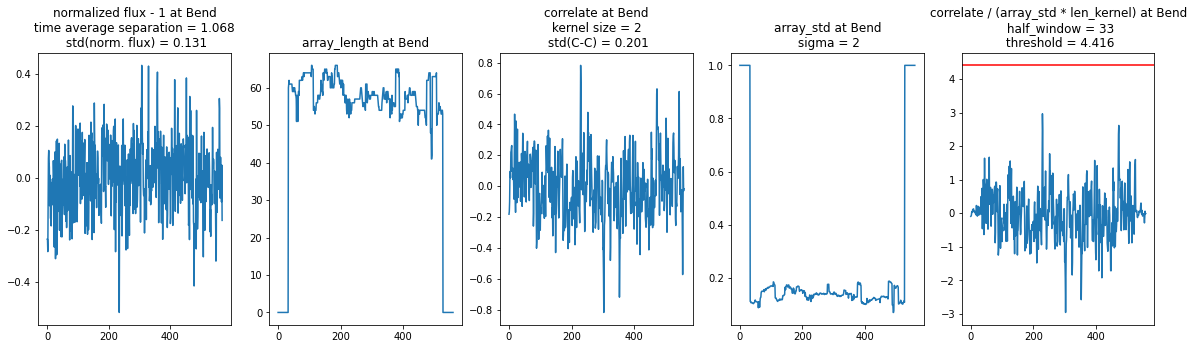

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Bishop
std C-C = 0.205
sigma = 2.000
threshold = 4.503
Ratio correlate / (array_std * len_kernel) is between -8.211 to 6.476
Kernel size : 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


3 possible detections in Bishop, in time : [18741.808 18748.218 18778.118]
--------------------------------------------------------------------------------------------
Location:  Bishop
std C-C = 0.395
sigma = 2.000
threshold = 8.701
There is no possible detection at Bishop with threshold = 8.700809137948735
Ratio correlate / (array_std * len_kernel) is between -3.166 to 3.054
Kernel size : 2


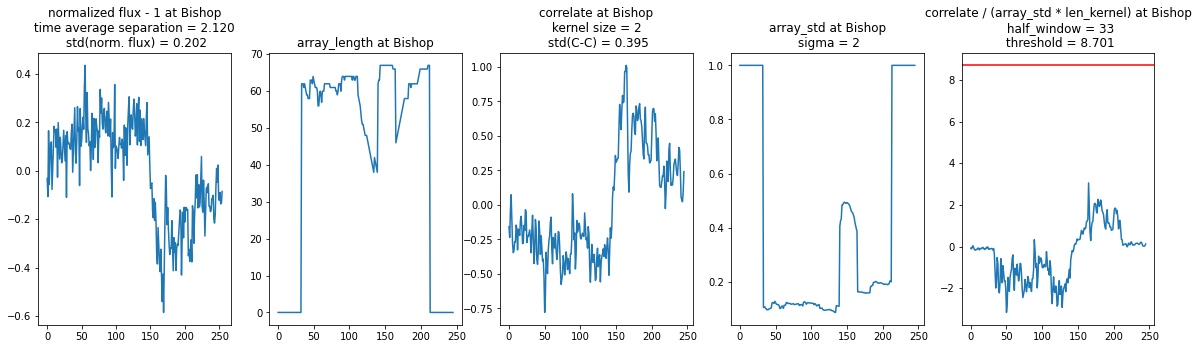

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Blythe
std C-C = 0.175
sigma = 2.000
threshold = 3.845
Ratio correlate / (array_std * len_kernel) is between -11.314 to 5.597
Kernel size : 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


4 possible detections in Blythe, in time : [18496.494 18546.684 18799.734 18877.674]
--------------------------------------------------------------------------------------------
Location:  Blythe
std C-C = 0.258
sigma = 2.000
threshold = 5.669
There is no possible detection at Blythe with threshold = 5.669264201961306
Ratio correlate / (array_std * len_kernel) is between -3.872 to 3.295
Kernel size : 2


--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  CPSLO
std C-C = 0.204
sigma = 2.000
threshold = 4.481
There is no possible detection at CPSLO with threshold = 4.481208095269096
Ratio correlate / (array_std * len_kernel) is between -3.993 to 3.323
Kernel size : 1


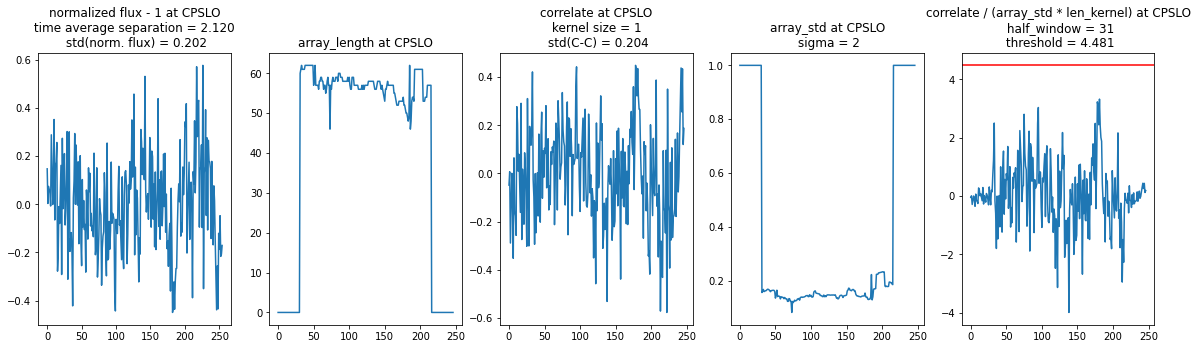

--------------------------------------------------------------------------------------------
Location:  CPSLO
std C-C = 0.323
sigma = 2.000
threshold = 7.113
There is no possible detection at CPSLO with threshold = 7.113028583106224
Ratio correlate / (array_std * len_kernel) is between -2.023 to 1.832
Kernel size : 2


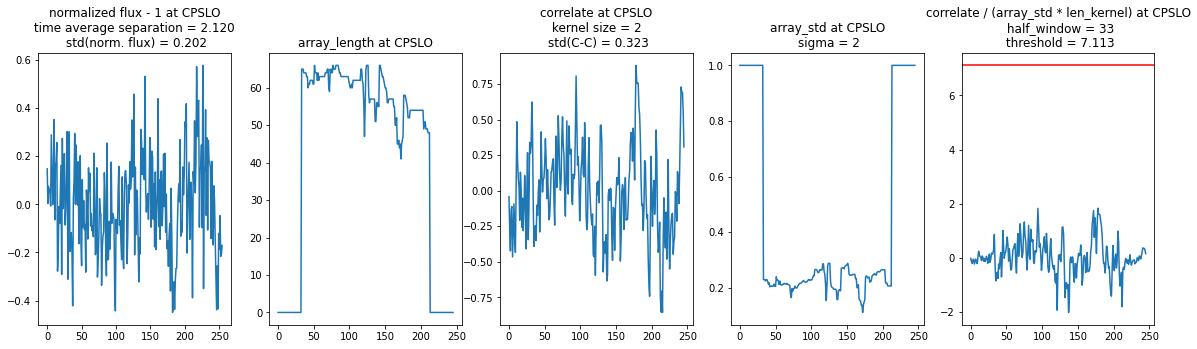

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Carson_City
std C-C = 0.095
sigma = 2.000
threshold = 2.091
Ratio correlate / (array_std * len_kernel) is between -4.941 to 3.657
Kernel size : 1


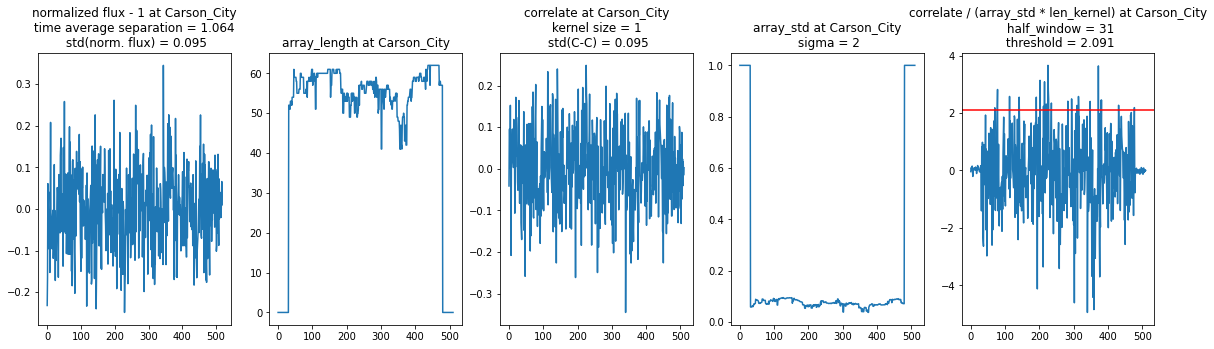

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


21 possible detections in Carson_City, in time : [18474.056 18482.599 18519.968 18549.863 18603.251 18614.996 18625.674
 18628.877 18634.214 18640.621 18650.232 18701.484 18713.228 18730.312
 18734.582 18770.886 18796.512 18803.986 18806.119 18859.507 18908.622]
--------------------------------------------------------------------------------------------
Location:  Carson_City
std C-C = 0.141
sigma = 2.000
threshold = 3.096
There is no possible detection at Carson_City with threshold = 3.096063357083371
Ratio correlate / (array_std * len_kernel) is between -2.013 to 2.478
Kernel size : 2


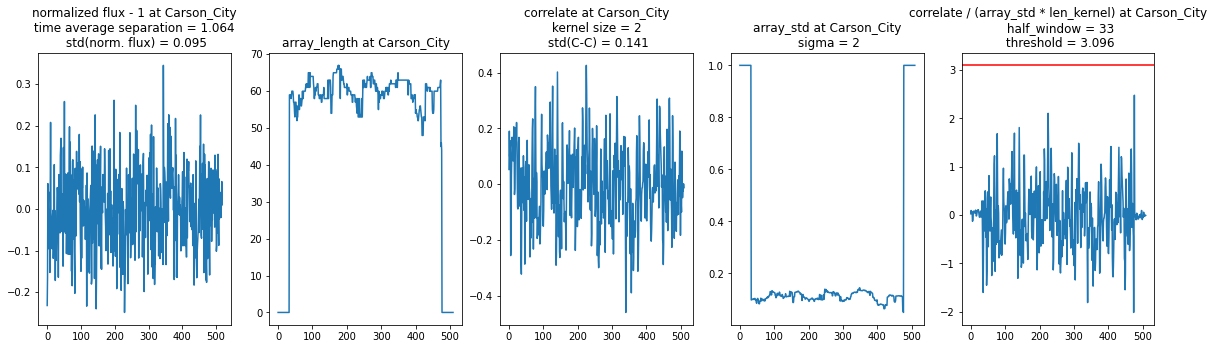

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Ellensburg
std C-C = 0.230
sigma = 2.000
threshold = 5.066
Ratio correlate / (array_std * len_kernel) is between -6.056 to 5.782
Kernel size : 1


3 possible detections in Ellensburg, in time : [18453.204 18599.484 18785.264]
--------------------------------------------------------------------------------------------
Location:  Ellensburg
std C-C = 0.359
sigma = 2.000
threshold = 7.893
There is no possible detection at Ellensburg with threshold = 7.893253831409097
Ratio correlate / (array_std * len_kernel) is between -3.840 to 3.588
Kernel size : 2


--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Goldendale
std C-C = 0.216
sigma = 2.000
threshold = 4.742
Ratio correlate / (array_std * len_kernel) is between -4.467 to 5.144
Kernel size : 1


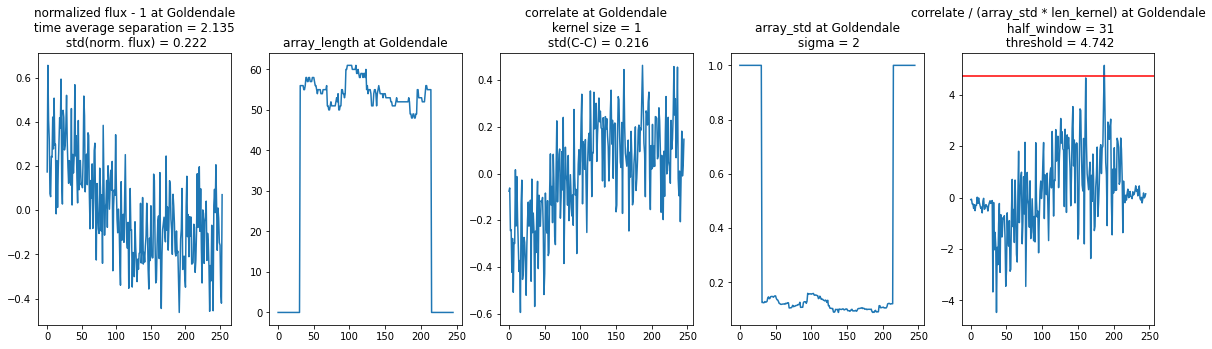

1 possible detections in Goldendale, in time : [18928.518]
--------------------------------------------------------------------------------------------
Location:  Goldendale
std C-C = 0.385
sigma = 2.000
threshold = 8.479
There is no possible detection at Goldendale with threshold = 8.478597990328351
Ratio correlate / (array_std * len_kernel) is between -1.867 to 2.046
Kernel size : 2


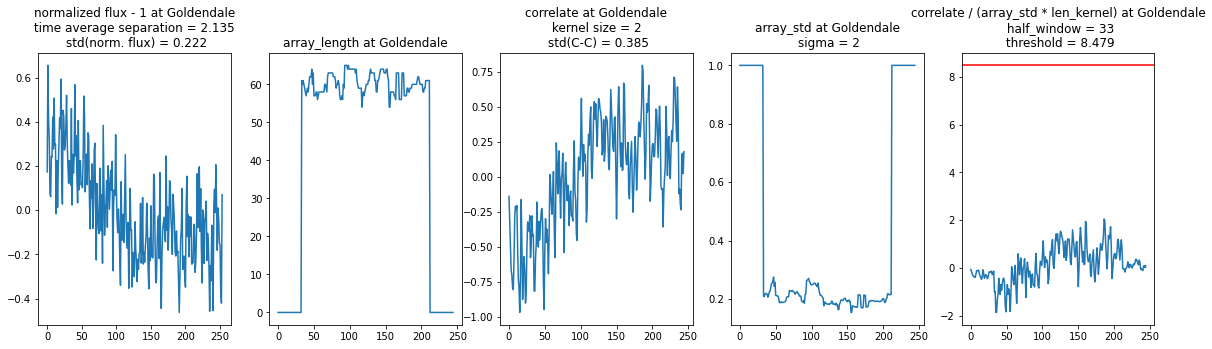

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Indian_springs
std C-C = 0.138
sigma = 2.000
threshold = 3.045
Ratio correlate / (array_std * len_kernel) is between -4.096 to 3.514
Kernel size : 1


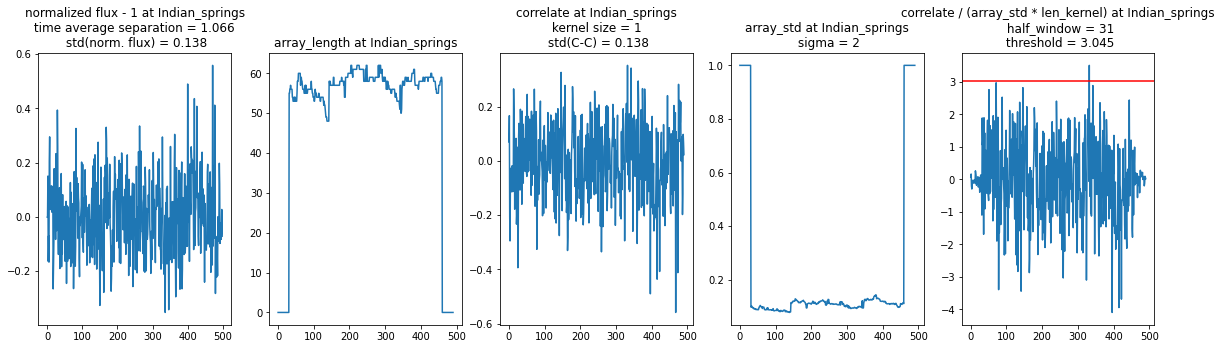

1 possible detections in Indian_springs, in time : [18749.714]
--------------------------------------------------------------------------------------------
Location:  Indian_springs
std C-C = 0.206
sigma = 2.000
threshold = 4.534
There is no possible detection at Indian_springs with threshold = 4.534242973521722
Ratio correlate / (array_std * len_kernel) is between -2.303 to 4.184
Kernel size : 2


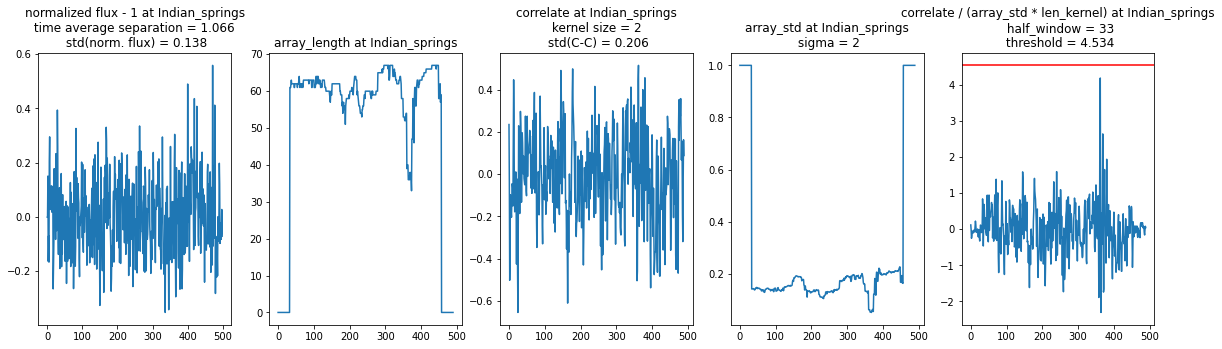

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Klamath_falls
std C-C = 0.138
sigma = 2.000
threshold = 3.033
Ratio correlate / (array_std * len_kernel) is between -5.491 to 4.573
Kernel size : 1


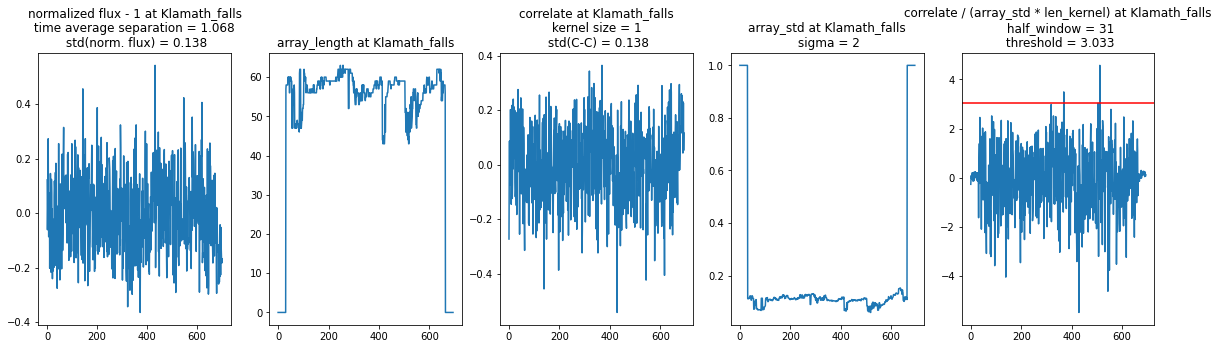

2 possible detections in Klamath_falls, in time : [18628.454 18781.134]
--------------------------------------------------------------------------------------------
Location:  Klamath_falls
std C-C = 0.207
sigma = 2.000
threshold = 4.557
There is no possible detection at Klamath_falls with threshold = 4.557340595079192
Ratio correlate / (array_std * len_kernel) is between -3.118 to 2.242
Kernel size : 2


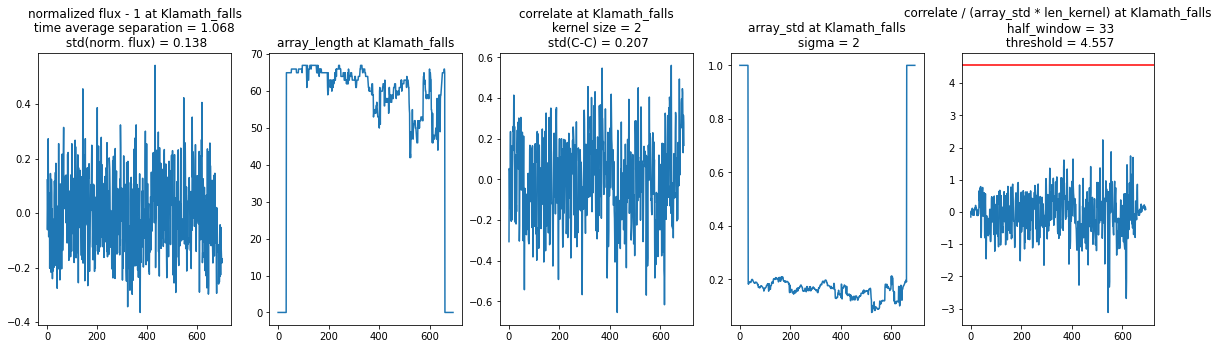

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Maupin
std C-C = 0.145
sigma = 2.000
threshold = 3.191
Ratio correlate / (array_std * len_kernel) is between -9.674 to 4.544
Kernel size : 1


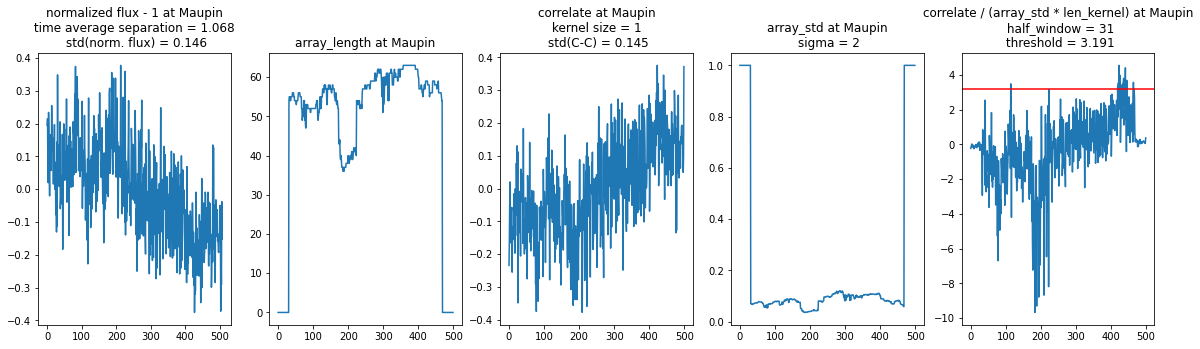

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10 possible detections in Maupin, in time : [18527.764 18853.414 18855.554 18857.694 18859.824 18865.164 18870.504
 18876.914 18881.184 18901.464]
--------------------------------------------------------------------------------------------
Location:  Maupin
std C-C = 0.246
sigma = 2.000
threshold = 5.416
There is no possible detection at Maupin with threshold = 5.416349811960792
Ratio correlate / (array_std * len_kernel) is between -6.225 to 3.077
Kernel size : 2


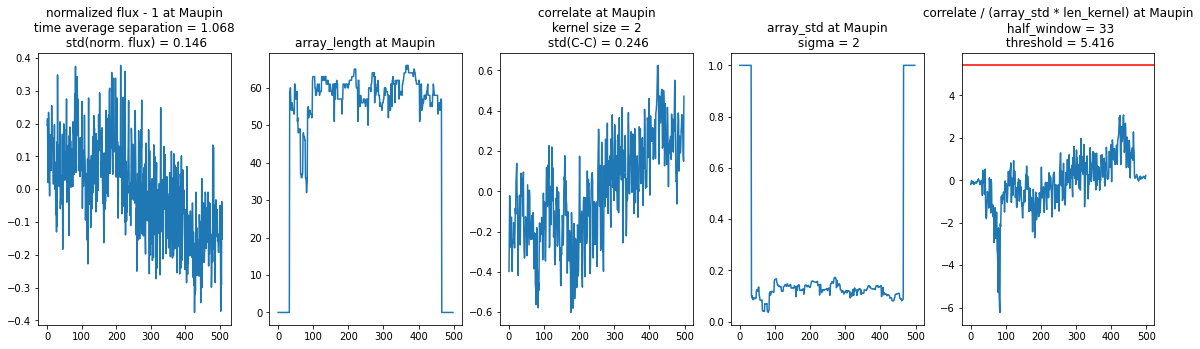

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Mohave_valley
std C-C = 0.165
sigma = 2.000
threshold = 3.623
Ratio correlate / (array_std * len_kernel) is between -7.605 to 3.856
Kernel size : 1


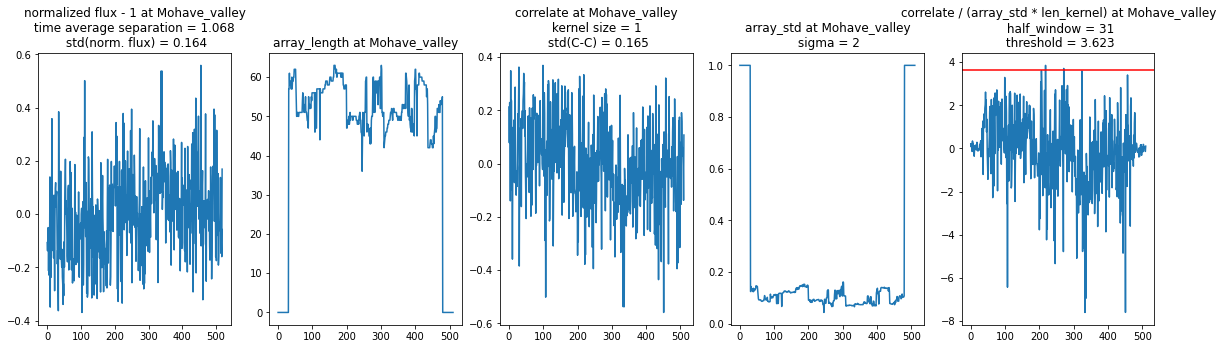

2 possible detections in Mohave_valley, in time : [18603.104 18659.694]
--------------------------------------------------------------------------------------------
Location:  Mohave_valley
std C-C = 0.249
sigma = 2.000
threshold = 5.486
There is no possible detection at Mohave_valley with threshold = 5.486335995070678
Ratio correlate / (array_std * len_kernel) is between -3.415 to 2.583
Kernel size : 2


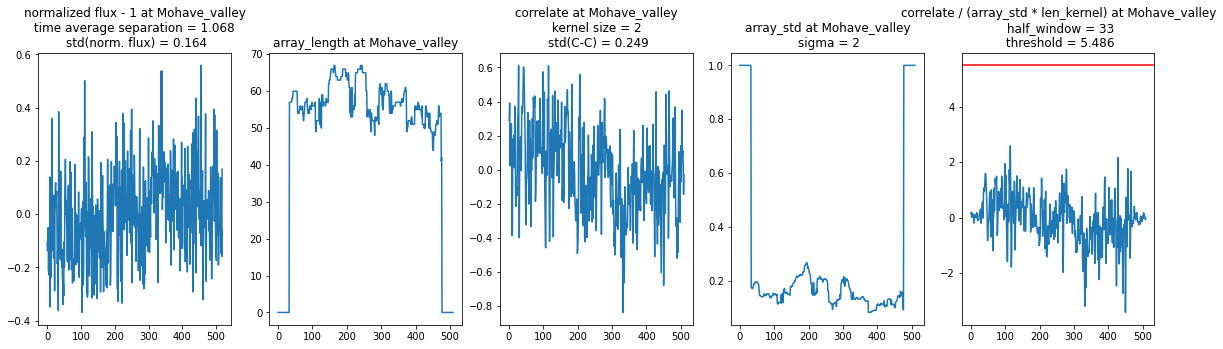

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Okanogan
std C-C = 0.110
sigma = 2.000
threshold = 2.428
Ratio correlate / (array_std * len_kernel) is between -5.058 to 4.633
Kernel size : 1


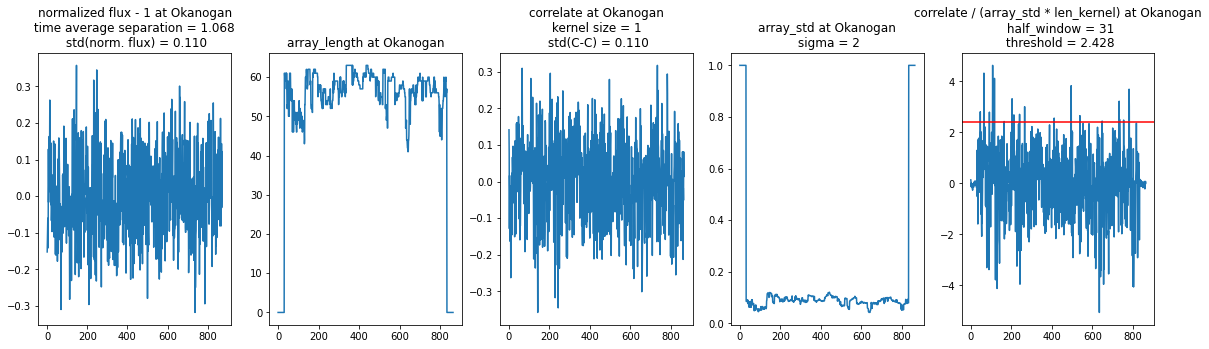

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


18 possible detections in Okanogan, in time : [18151.254 18169.404 18199.294 18215.314 18225.994 18277.244 18318.884
 18328.494 18358.394 18385.084 18540.974 18630.664 18676.574 18794.024
 18883.714 18885.844 18907.204 18936.024]
--------------------------------------------------------------------------------------------
Location:  Okanogan
std C-C = 0.171
sigma = 2.000
threshold = 3.772
There is no possible detection at Okanogan with threshold = 3.7720119633238554
Ratio correlate / (array_std * len_kernel) is between -1.925 to 2.293
Kernel size : 2


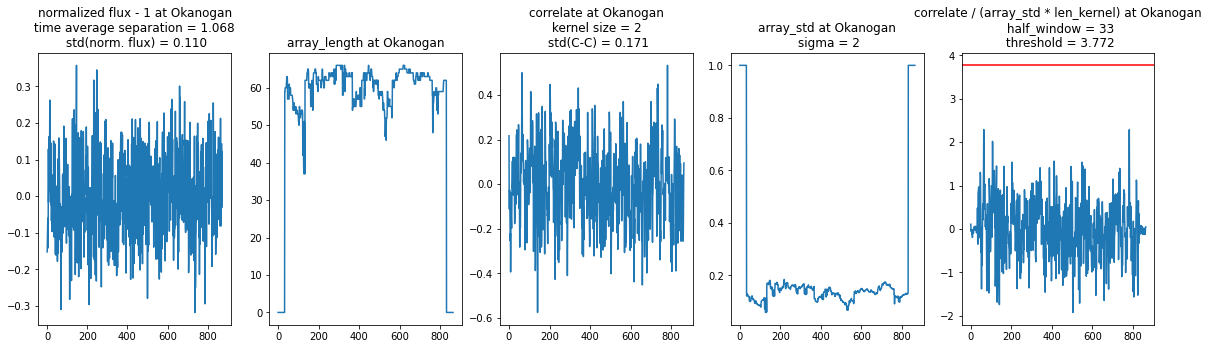

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Oregon_obs
std C-C = 0.190
sigma = 2.000
threshold = 4.186
Ratio correlate / (array_std * len_kernel) is between -4.380 to 5.442
Kernel size : 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


12 possible detections in Oregon_obs, in time : [18348.904 18356.374 18359.584 18361.714 18364.914 18368.114 18372.394
 18384.134 18386.274 18396.944 18402.284 18490.904]
--------------------------------------------------------------------------------------------
Location:  Oregon_obs
std C-C = 0.346
sigma = 2.000
threshold = 7.607
There is no possible detection at Oregon_obs with threshold = 7.60724154800821
Ratio correlate / (array_std * len_kernel) is between -3.115 to 4.576
Kernel size : 2


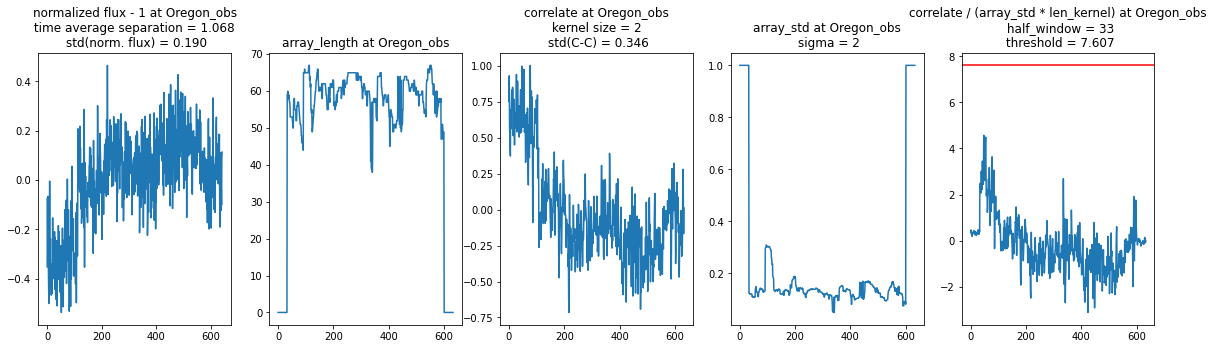

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Parker
std C-C = 0.096
sigma = 2.000
threshold = 2.115
Ratio correlate / (array_std * len_kernel) is between -4.487 to 4.094
Kernel size : 1


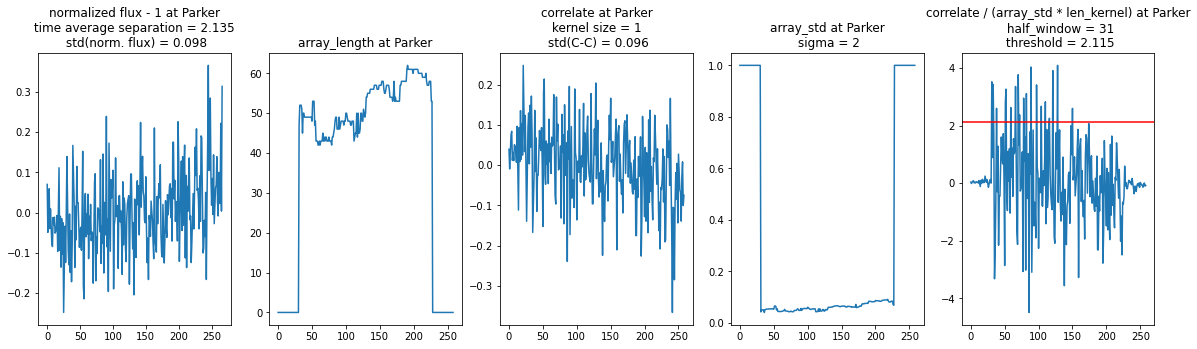

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


18 possible detections in Parker, in time : [18439.578 18443.848 18454.528 18482.288 18499.368 18514.318 18522.858
 18527.128 18539.948 18548.488 18563.438 18580.518 18595.458 18608.278
 18621.088 18631.768 18646.718 18693.698]
--------------------------------------------------------------------------------------------
Location:  Parker
std C-C = 0.145
sigma = 2.000
threshold = 3.197
There is no possible detection at Parker with threshold = 3.1968205327465027
Ratio correlate / (array_std * len_kernel) is between -3.044 to 2.821
Kernel size : 2


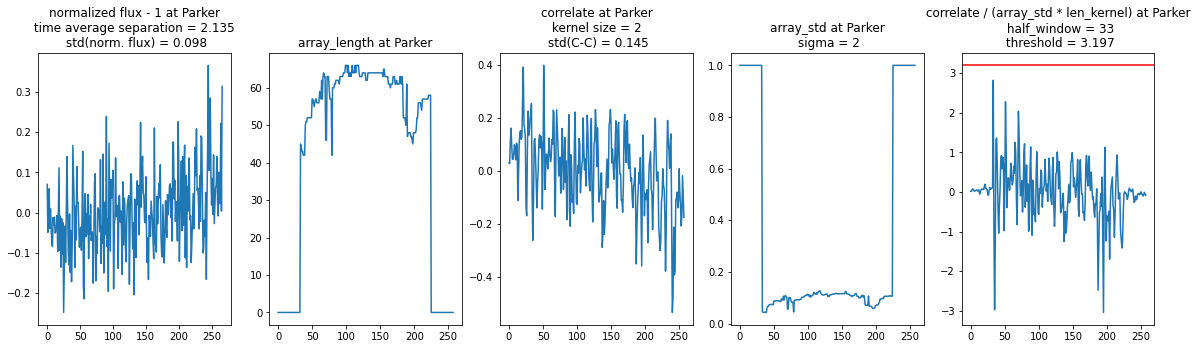

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Quincy
std C-C = 0.090
sigma = 2.000
threshold = 1.973
Ratio correlate / (array_std * len_kernel) is between -3.590 to 12.754
Kernel size : 1


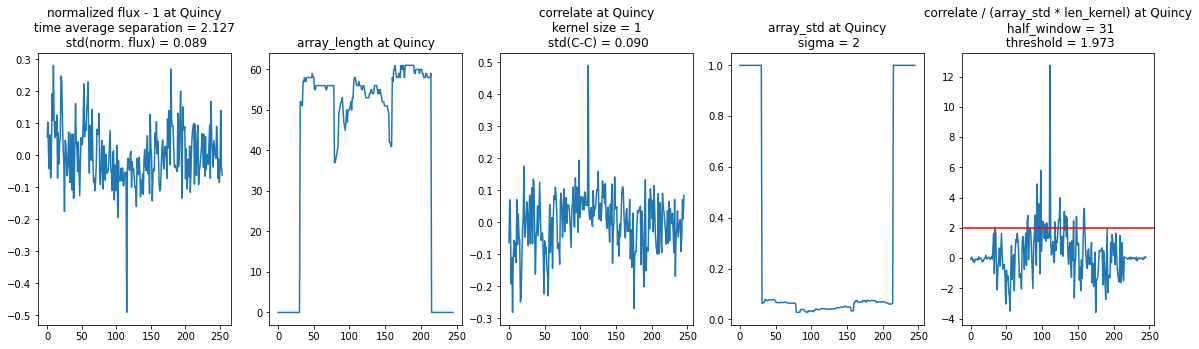

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


19 possible detections in Quincy, in time : [18481.509 18577.605 18601.095 18607.5 18611.772 18618.179 18624.584
 18630.991 18635.263 18645.942 18660.889 18673.7 18688.649 18692.919
 18697.191 18716.31 18724.953 18746.305 18816.777]
--------------------------------------------------------------------------------------------
Location:  Quincy
std C-C = 0.146
sigma = 2.000
threshold = 3.214
Ratio correlate / (array_std * len_kernel) is between -1.762 to 5.263
Kernel size : 2


1 possible detections in Quincy, in time : [18645.942]
--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Quincy_b
std C-C = 0.099
sigma = 2.000
threshold = 2.180
Ratio correlate / (array_std * len_kernel) is between -3.590 to 12.490
Kernel size : 1


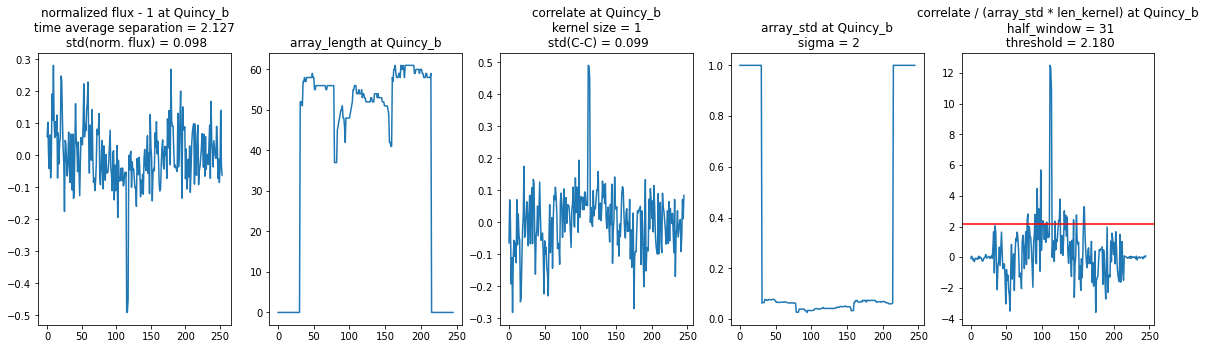

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


16 possible detections in Quincy_b, in time : [18577.605 18601.095 18607.5 18611.772 18618.179 18624.584 18635.263
 18648.077 18660.889 18673.7 18688.649 18692.919 18697.191 18716.31
 18724.953 18746.305]
--------------------------------------------------------------------------------------------
Location:  Quincy_b
std C-C = 0.169
sigma = 2.000
threshold = 3.712
Ratio correlate / (array_std * len_kernel) is between -1.762 to 9.565
Kernel size : 2


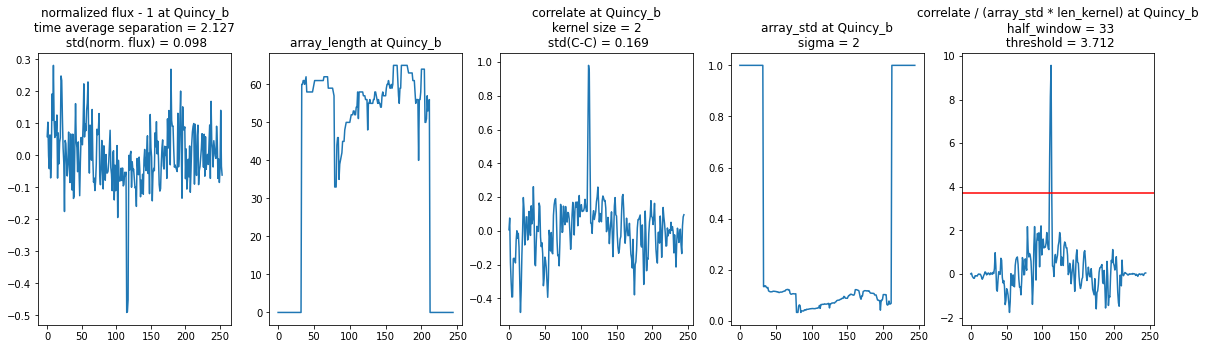

1 possible detections in Quincy_b, in time : [18648.077]
--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Reno
std C-C = 0.129
sigma = 2.000
threshold = 2.828
Ratio correlate / (array_std * len_kernel) is between -7.907 to 9.858
Kernel size : 1


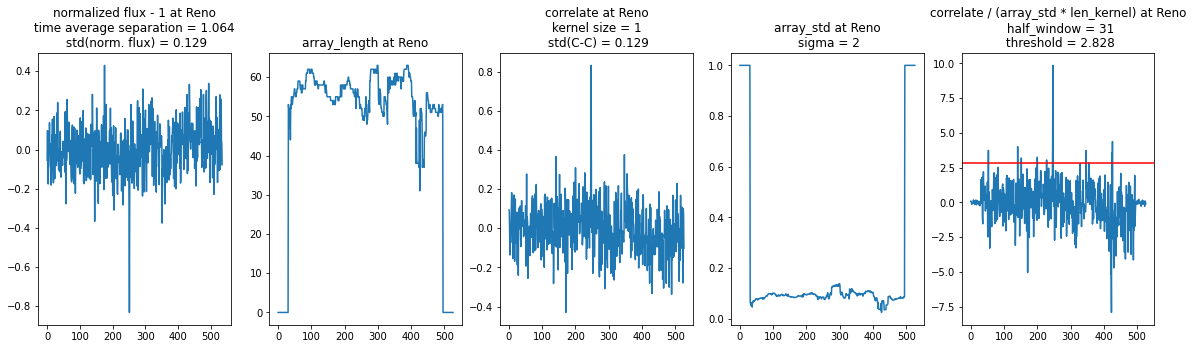

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10 possible detections in Reno, in time : [18434.274 18528.237 18539.981 18591.232 18621.128 18640.348 18748.188
 18756.732 18830.405 18832.54]
--------------------------------------------------------------------------------------------
Location:  Reno
std C-C = 0.192
sigma = 2.000
threshold = 4.234
Ratio correlate / (array_std * len_kernel) is between -3.844 to 6.936
Kernel size : 2


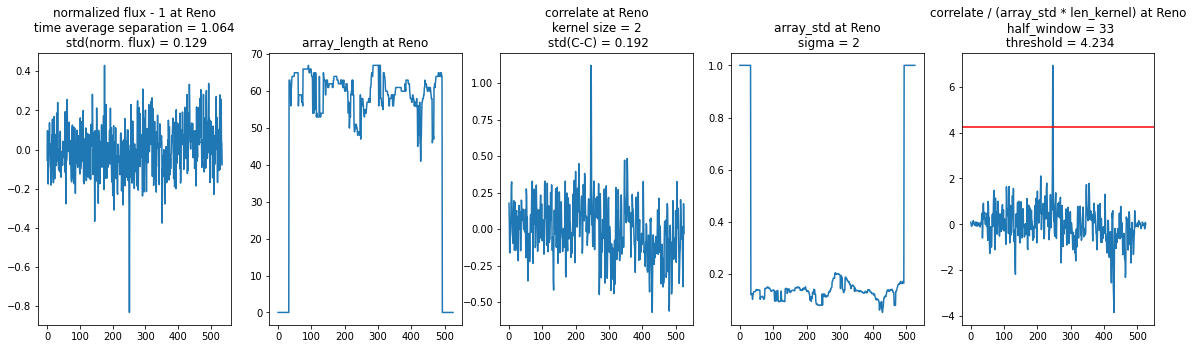

1 possible detections in Reno, in time : [18641.416]
--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Sisters
std C-C = 0.133
sigma = 2.000
threshold = 2.925
Ratio correlate / (array_std * len_kernel) is between -4.610 to 4.644
Kernel size : 1


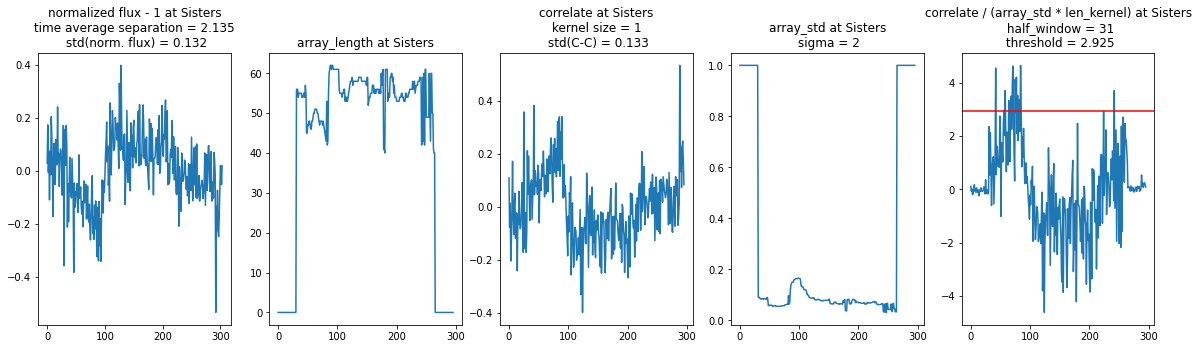

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


12 possible detections in Sisters, in time : [18418.448 18448.348 18452.618 18465.428 18471.838 18480.378 18488.918
 18493.188 18497.458 18503.868 18508.138 18845.538]
--------------------------------------------------------------------------------------------
Location:  Sisters
std C-C = 0.231
sigma = 2.000
threshold = 5.075
There is no possible detection at Sisters with threshold = 5.074737279727621
Ratio correlate / (array_std * len_kernel) is between -3.508 to 2.453
Kernel size : 2


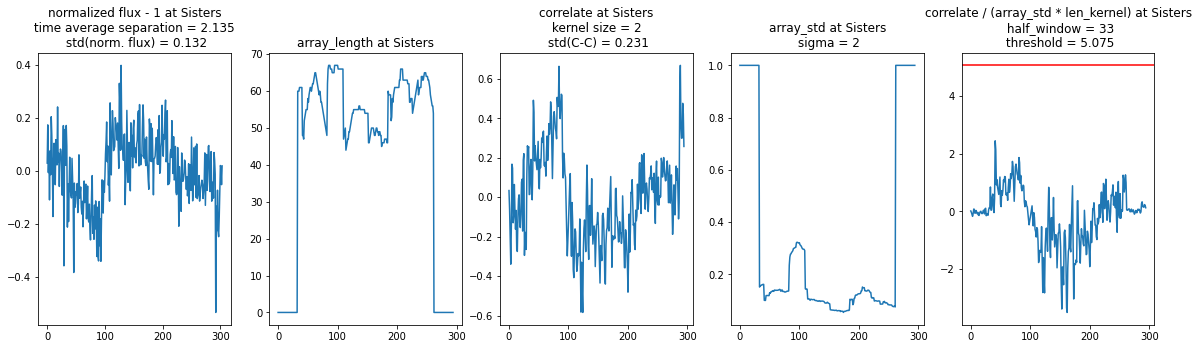

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Susanville
std C-C = 1.918
sigma = 2.000
threshold = 42.205
There is no possible detection at Susanville with threshold = 42.20475357797141
Ratio correlate / (array_std * len_kernel) is between -13.358 to 9.148
Kernel size : 1


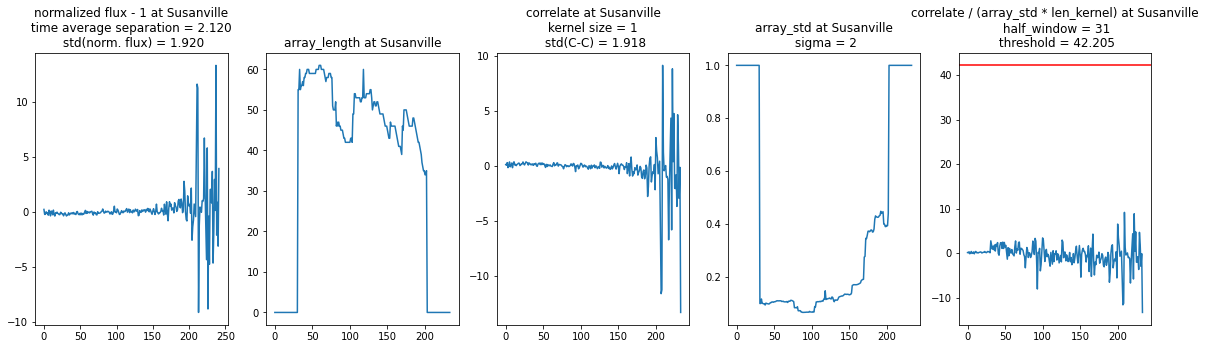

--------------------------------------------------------------------------------------------
Location:  Susanville
std C-C = 2.661
sigma = 2.000
threshold = 58.538
There is no possible detection at Susanville with threshold = 58.537831464309164
Ratio correlate / (array_std * len_kernel) is between -11.471 to 5.188
Kernel size : 2


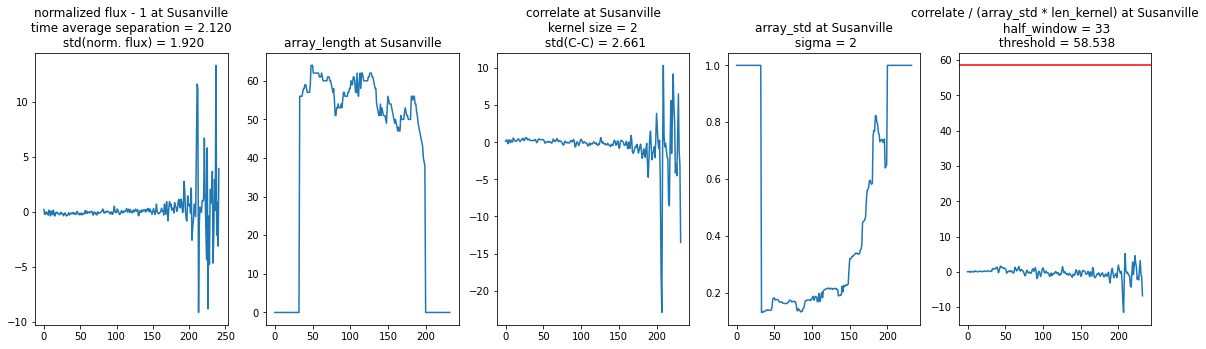

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Susanville_b
std C-C = 1.923
sigma = 2.000
threshold = 42.295
There is no possible detection at Susanville_b with threshold = 42.29535814620555
Ratio correlate / (array_std * len_kernel) is between -13.358 to 15.050
Kernel size : 1


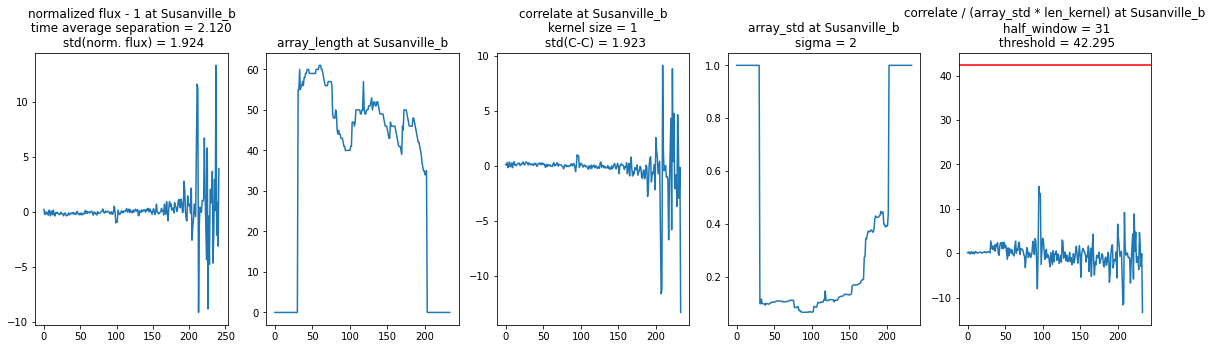

--------------------------------------------------------------------------------------------
Location:  Susanville_b
std C-C = 2.671
sigma = 2.000
threshold = 58.752
There is no possible detection at Susanville_b with threshold = 58.75172151802889
Ratio correlate / (array_std * len_kernel) is between -11.471 to 5.255
Kernel size : 2


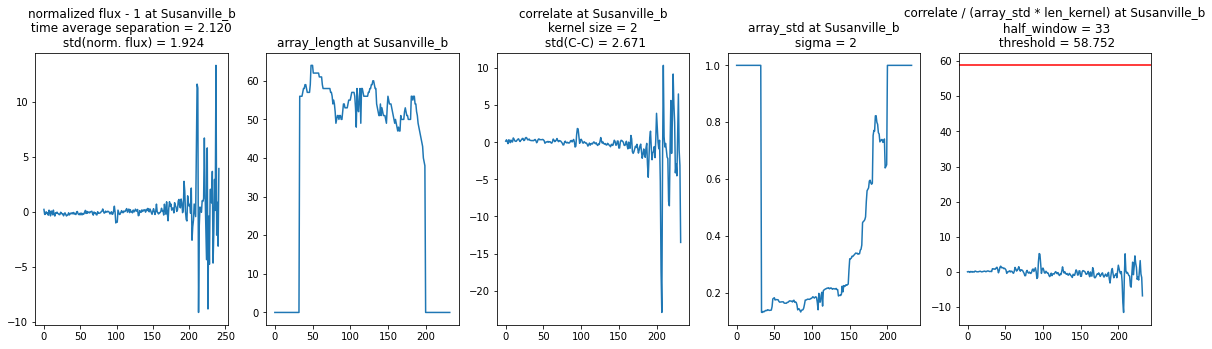

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Susanville_c
std C-C = 1.940
sigma = 2.000
threshold = 42.679
There is no possible detection at Susanville_c with threshold = 42.6786512975993
Ratio correlate / (array_std * len_kernel) is between -24.239 to 18.718
Kernel size : 1


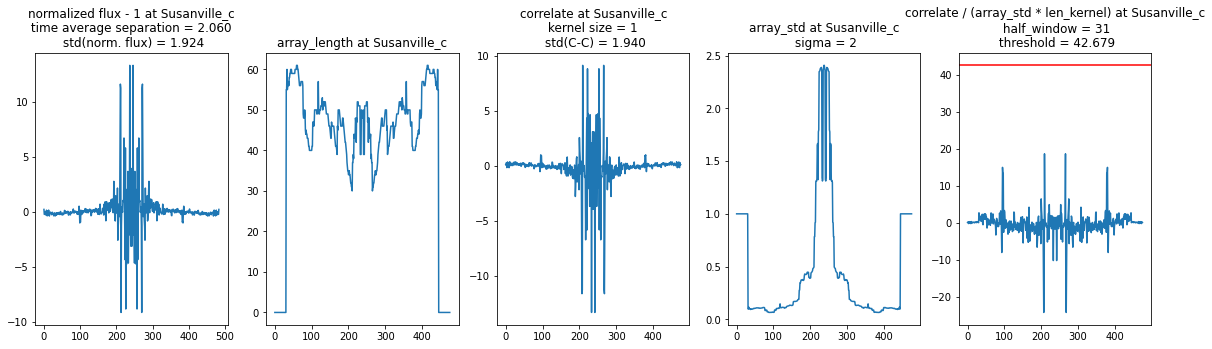

--------------------------------------------------------------------------------------------
Location:  Susanville_c
std C-C = 2.767
sigma = 2.000
threshold = 60.878
There is no possible detection at Susanville_c with threshold = 60.87826606196878
Ratio correlate / (array_std * len_kernel) is between -15.564 to 6.974
Kernel size : 2


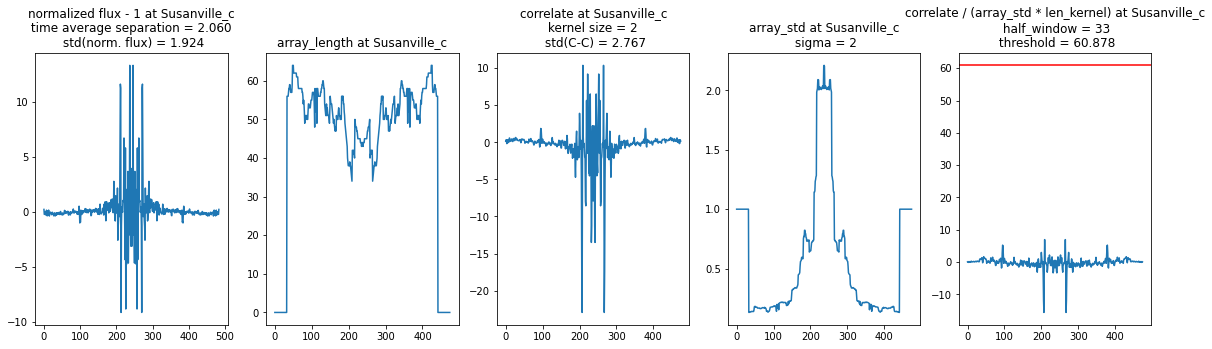

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Wildwood
std C-C = 28.812
sigma = 2.000
threshold = 633.875
Ratio correlate / (array_std * len_kernel) is between -19.557 to 5521.067
Kernel size : 1


1 possible detections in Wildwood, in time : [18754.564]
--------------------------------------------------------------------------------------------
Location:  Wildwood
std C-C = 40.757
sigma = 2.000
threshold = 896.655
Ratio correlate / (array_std * len_kernel) is between -6.200 to 929.543
Kernel size : 2


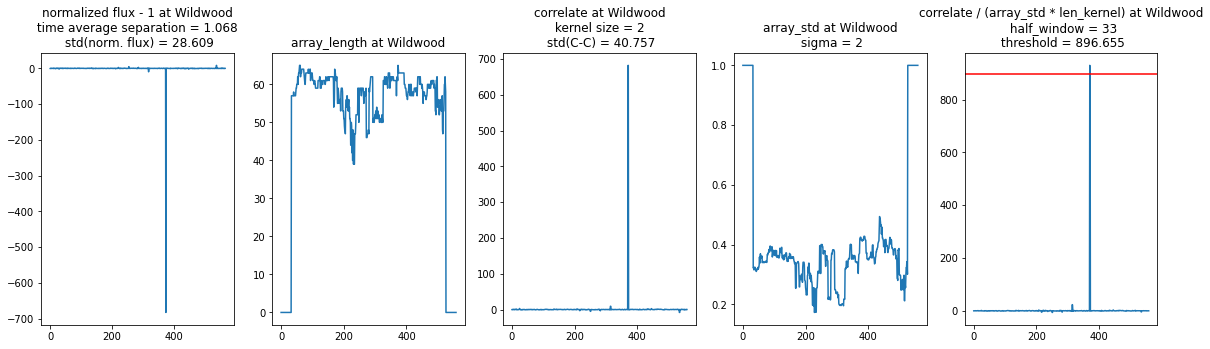

1 possible detections in Wildwood, in time : [18754.564]
--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Yakima
std C-C = 0.146
sigma = 2.000
threshold = 3.204
Ratio correlate / (array_std * len_kernel) is between -5.632 to 3.749
Kernel size : 1


2 possible detections in Yakima, in time : [18841.174 18897.764]
--------------------------------------------------------------------------------------------
Location:  Yakima
std C-C = 0.214
sigma = 2.000
threshold = 4.706
There is no possible detection at Yakima with threshold = 4.705928194076737
Ratio correlate / (array_std * len_kernel) is between -7.005 to 4.603
Kernel size : 2


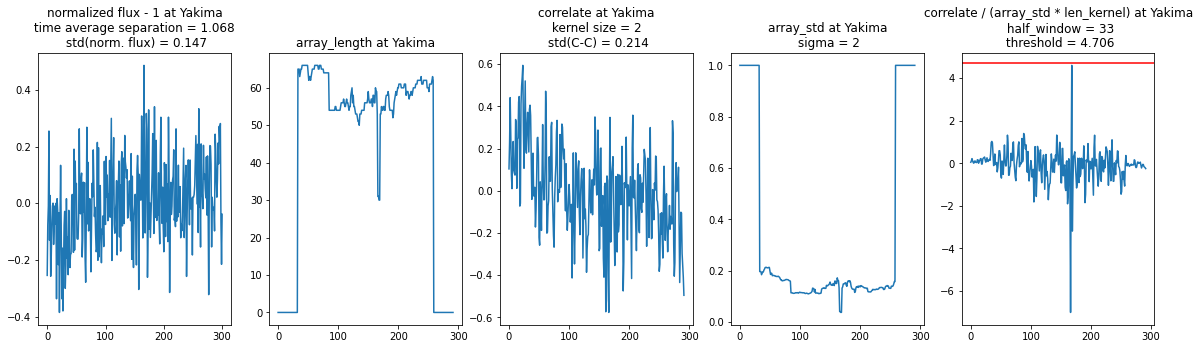

--------------------------------------------------------------------------------------------
Kernel size, uncertainty of kernel size:  (1, 1)
Predicted kernel sizes:  [0, 1, 2]
Location:  Yuma
std C-C = 0.161
sigma = 2.000
threshold = 3.552
Ratio correlate / (array_std * len_kernel) is between -5.735 to 11.524
Kernel size : 1


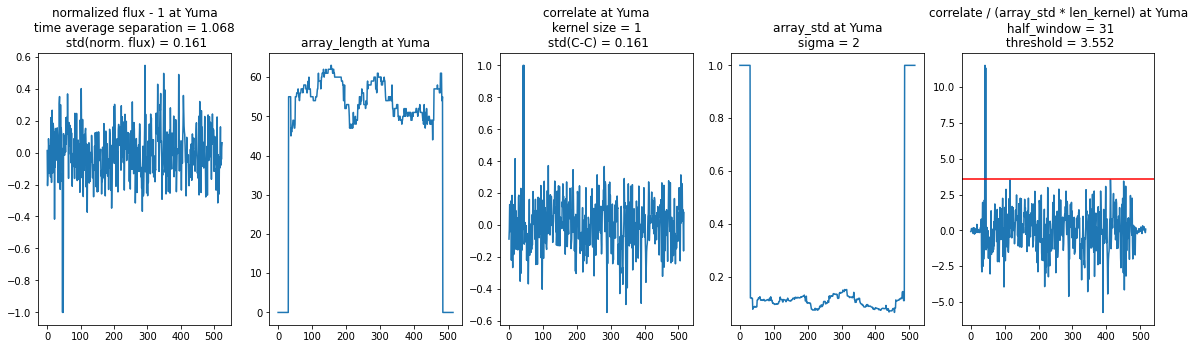

2 possible detections in Yuma, in time : [18467.622 18349.756]
--------------------------------------------------------------------------------------------
Location:  Yuma
std C-C = 0.243
sigma = 2.000
threshold = 5.347
There is no possible detection at Yuma with threshold = 5.346560342514028
Ratio correlate / (array_std * len_kernel) is between -3.595 to 4.242
Kernel size : 2


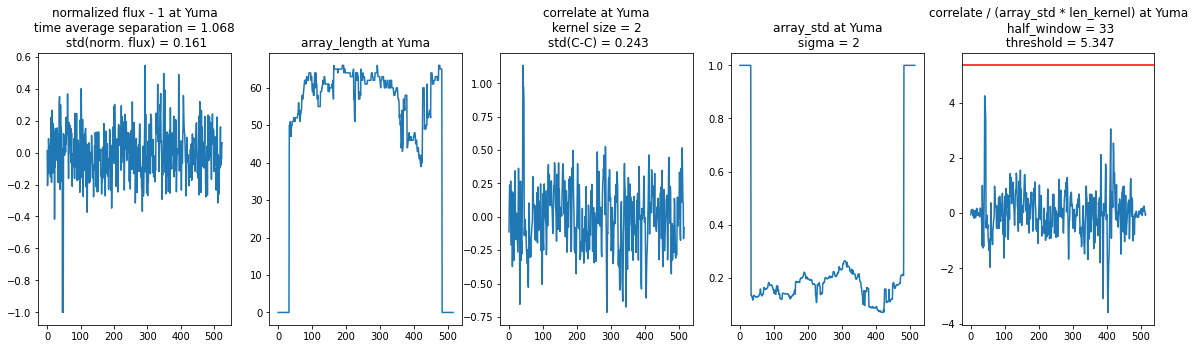

--------------------------------------------------------------------------------------------


In [30]:
duration = 2.6 # assuming 5 % albedo <-> diameter=55.2 km and the TNO is moving 21.5 km/sec
# duration = 1 # assuming 30% albedo <-> diameter=22.5 km and the TNO is moving 21.5 km/sec
# itero sobre todas las localidades
for filename in namelist:
  time, norm_flux, flux_unc, time_avg_sep = get_basic_data('20190128_Susanville_b.dat')
  kernel_size, unc_kernel_size = size_kernel(exposure_time=time_avg_sep, maximum_exp_event_duration=duration)
  k1, k2, k3 = kernel_size-unc_kernel_size, kernel_size, kernel_size+unc_kernel_size
  list_kernel = [k1, k2, k3]
  print('Kernel size, uncertainty of kernel size: ', size_kernel(exposure_time=time_avg_sep, maximum_exp_event_duration=duration))
  print('Predicted kernel sizes: ', list_kernel)
  for k in list_kernel:
    if k==0:
      pass
    else:
      algorithm(filename, kernel_size=k, time=time, norm_flux=norm_flux, flux_unc=flux_unc,
                time_avg_sep=time_avg_sep, half_window=30, sigma=2)

In [32]:
duration = 1 # assuming 30% albedo <-> diameter=22.5 km and the TNO is moving 21.5 km/sec
# itero sobre todas las localidades
for filename in namelist:
  time, norm_flux, flux_unc, time_avg_sep = get_basic_data('20190128_Susanville_b.dat')
  kernel_size, unc_kernel_size = size_kernel(exposure_time=time_avg_sep, maximum_exp_event_duration=duration)
  k1, k2, k3 = kernel_size-unc_kernel_size, kernel_size, kernel_size+unc_kernel_size
  list_kernel = [k1, k2, k3]
  print('Kernel size, uncertainty of kernel size: ', size_kernel(exposure_time=time_avg_sep, maximum_exp_event_duration=duration))
  print('Predicted kernel sizes: ', list_kernel)
  for k in list_kernel:
    if k==0:
      pass
    else:
      algorithm(filename, kernel_size=k, time=time, norm_flux=norm_flux, flux_unc=flux_unc,
                time_avg_sep=time_avg_sep, half_window=30, sigma=2)

Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0, 0, 0]
Kernel size, uncertainty of kernel size:  (0, 0)
Predicted kernel sizes:  [0